In [4]:
# astropy==4.1, numpy==1.19.5
!pip uninstall numpy
!pip uninstall astropy

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)?   ERROR: Operation cancelled by user
Found existing installation: astropy 4.3.1
Uninstalling astropy-4.3.1:
  Would remove:
    /usr/local/bin/fits2bitmap
    /usr/local/bin/fitscheck
    /usr/local/bin/fitsdiff
    /usr/local/bin/fitsheader
    /usr/local/bin/fitsinfo
    /usr/local/bin/samp_hub
    /usr/local/bin/showtable
    /usr/local/bin/volint
    /usr/local/bin/wcslint
    /usr/local/lib/python3.7/dist-packages/astropy-4

In [5]:
!pip install astropy==4.1
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 22.4 MB/s 
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 404 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.

In [1]:
# numpy==1.19.5, astropy==4.1
import matplotlib.pyplot as plt
import numpy as np
import astropy
np.__version__, astropy.__version__

('1.19.5', '4.1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


<Figure size 432x288 with 0 Axes>

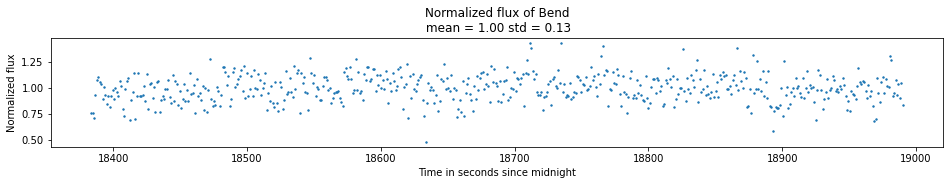

<Figure size 432x288 with 0 Axes>

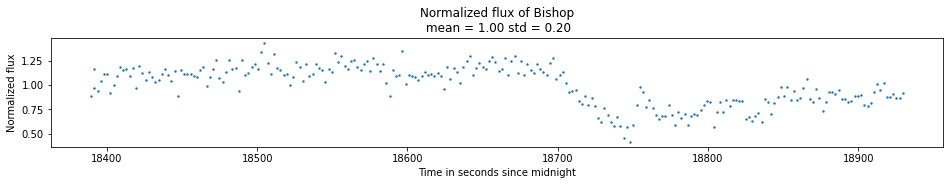

<Figure size 432x288 with 0 Axes>

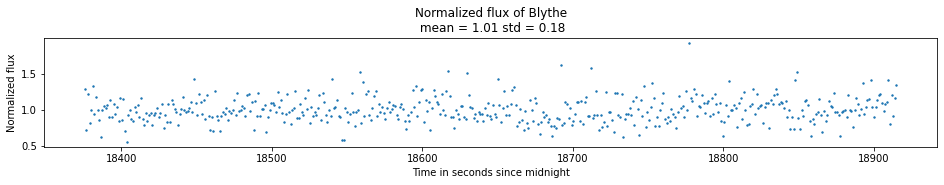

<Figure size 432x288 with 0 Axes>

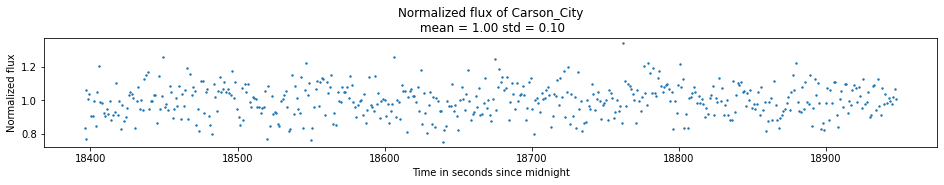

<Figure size 432x288 with 0 Axes>

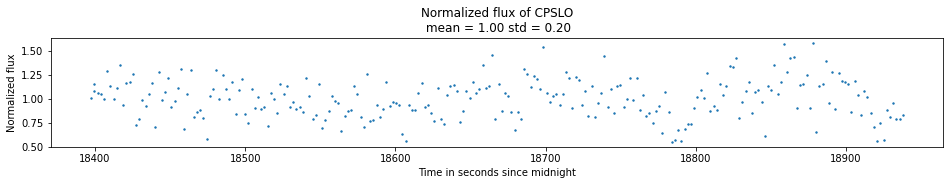

<Figure size 432x288 with 0 Axes>

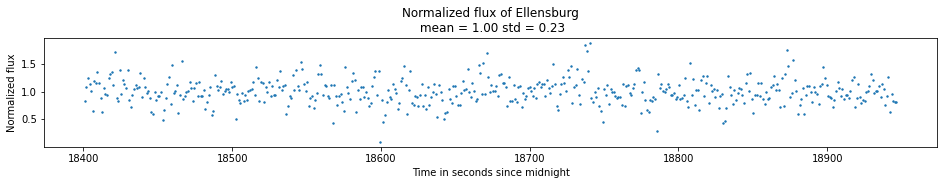

<Figure size 432x288 with 0 Axes>

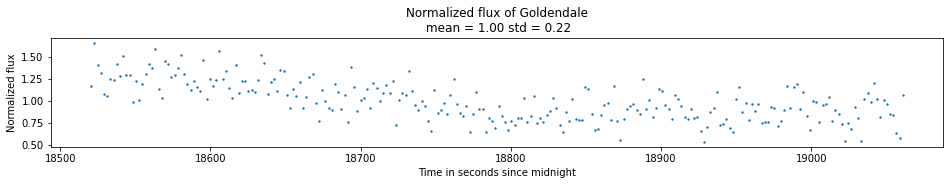

<Figure size 432x288 with 0 Axes>

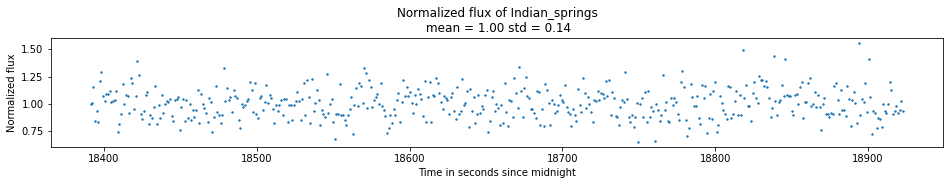

<Figure size 432x288 with 0 Axes>

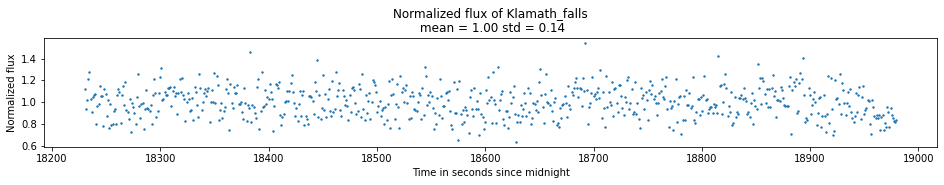

<Figure size 432x288 with 0 Axes>

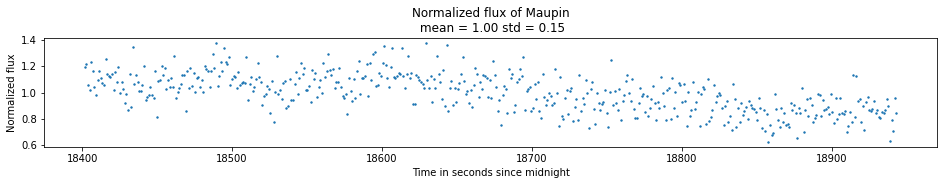

<Figure size 432x288 with 0 Axes>

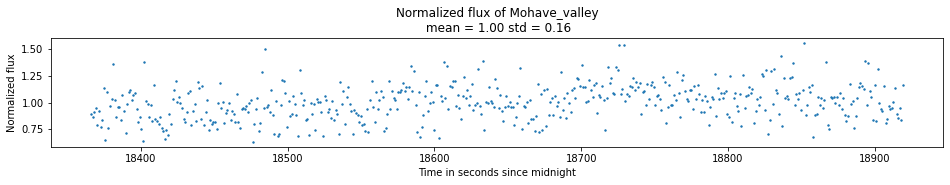

<Figure size 432x288 with 0 Axes>

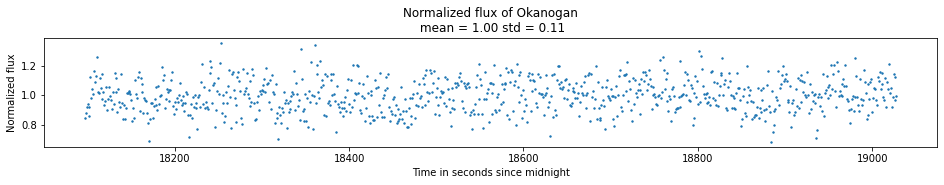

<Figure size 432x288 with 0 Axes>

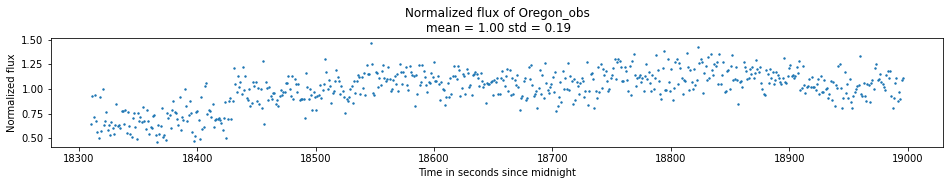

<Figure size 432x288 with 0 Axes>

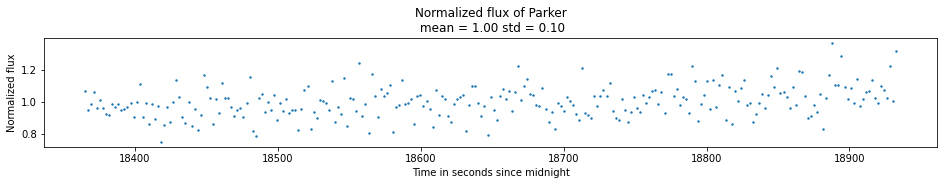

<Figure size 432x288 with 0 Axes>

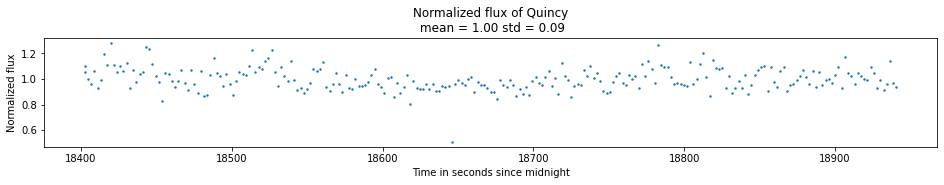

<Figure size 432x288 with 0 Axes>

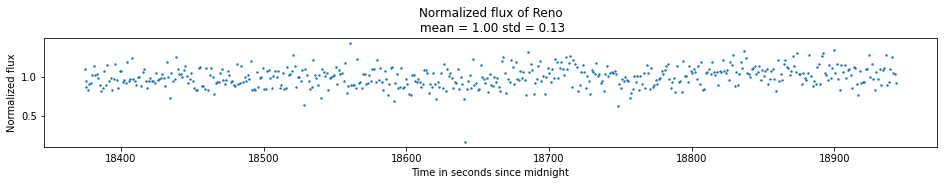

<Figure size 432x288 with 0 Axes>

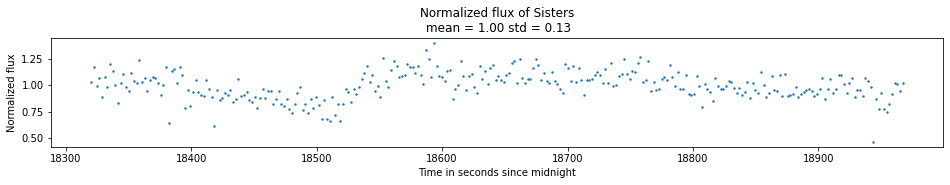

Mean < std in Susanville location


<Figure size 432x288 with 0 Axes>

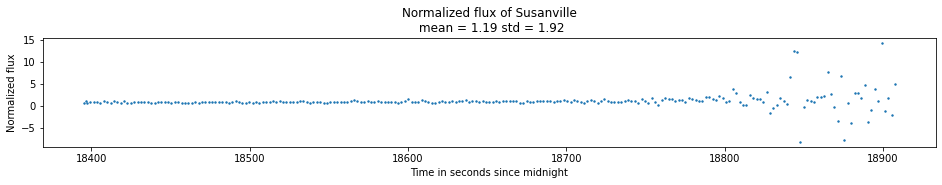

Mean < std in Susanville_b location


<Figure size 432x288 with 0 Axes>

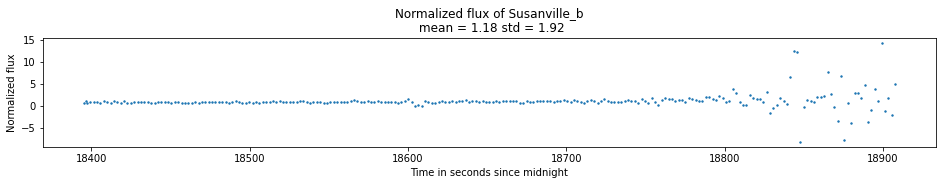

Mean < std in Susanville_c location


<Figure size 432x288 with 0 Axes>

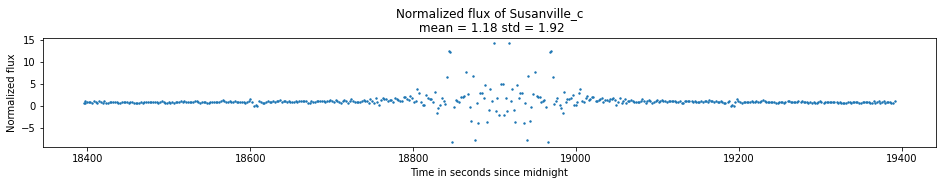

Mean < std in Wildwood location


<Figure size 432x288 with 0 Axes>

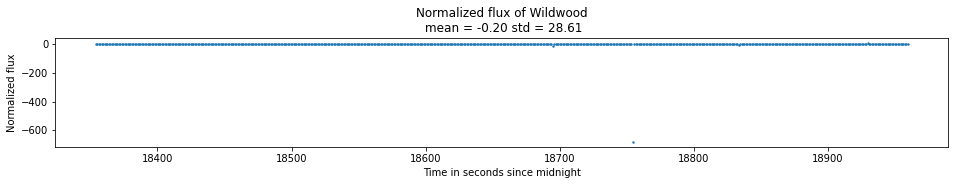

<Figure size 432x288 with 0 Axes>

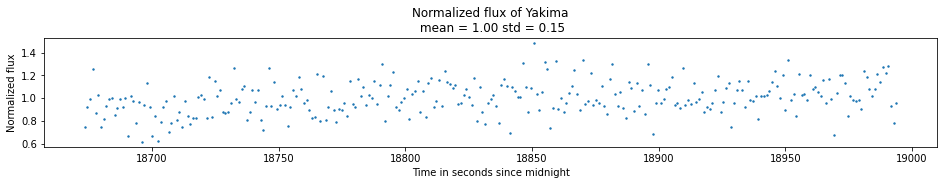

<Figure size 432x288 with 0 Axes>

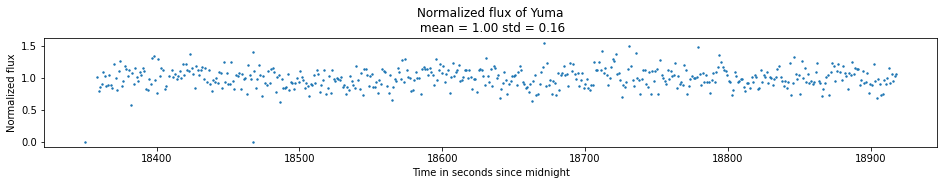

In [2]:
def is_float(string):
    """
    True if given string is float else False
    
    Input:
      string [string]: Data which is a string, for example the time, the
                       normalized flux, or the uncertainty of the flux
    
    Output:
      float(string) [float]: The float of the string
    """
    try:
        return float(string)
    except ValueError:
        return False

!pip install zipfile
from zipfile import ZipFile
archivos = ZipFile('lc_20190128_2014YY49-original.zip', 'r')
# archivos = np.load('lc_20190128_2014YY49.zip')
archivos.extractall()

size = (16, 2)

namelist = ['20190128_Bend.dat',
 '20190128_Bishop.dat',
 '20190128_Blythe.dat',
 '20190128_Carson_City.dat',
 '20190128_CPSLO.dat',
 '20190128_Ellensburg.dat',
 '20190128_Goldendale.dat',
 '20190128_Indian_springs.dat',
 '20190128_Klamath_falls.dat',
 '20190128_Maupin.dat',
 '20190128_Mohave_valley.dat',
 '20190128_Okanogan.dat',
 '20190128_Oregon_obs.dat',
 '20190128_Parker.dat',
 '20190128_Quincy.dat',
 '20190128_Reno.dat',
 '20190128_Sisters.dat',
 '20190128_Susanville.dat',
 '20190128_Susanville_b.dat',
 '20190128_Susanville_c.dat',
 '20190128_Wildwood.dat',
 '20190128_Yakima.dat',
 '20190128_Yuma.dat']

mean_less_than_std = []

for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  # for i in flux_unc:
  #   print(i)
  #   if flux_unc[i].isdigit() == False:  # si es que hay un string '****'
  #     mean = np.mean(norm_flux)
  #     std = np.std(norm_flux)
  #     plt.clf()
  #     plt.errorbar(time, norm_flux)
  #     plt.xlabel("Time in seconds since midnight")
  #     plt.ylabel("Normalized flux")
  #     plt.title(str(file)[:-4]+'\n mean: {:.2f}'.format(mean)+' std: {:.2f}'.format(std))
  #     plt.show()
  for i in range(len(norm_flux)): 
    if np.abs(norm_flux[i] - np.mean(norm_flux)) > 1*np.std(norm_flux[i]): # si es que un dato se pasa de 1σ (y comparado con datos vecinos)
      pass
  mean = np.mean(norm_flux)
  std = np.std(norm_flux)
  plt.clf()
  plt.figure(figsize=size)
  # plt.errorbar(time, norm_flux, yerr=flux_unc, ecolor='orange')
  plt.scatter(time, norm_flux, s=2)
  if mean < std:
    print('Mean < std in '+str(file)[9:-4]+' location')
    mean_less_than_std.append(str(file)[9:-4])
  plt.xlabel("Time in seconds since midnight")
  plt.ylabel("Normalized flux")
  plt.title('Normalized flux of '+str(file)[9:-4]+'\n mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std))
  plt.show()


# flux_unc = data[:, 2]
# plt.errorbar(time, norm_flux, yerr=flux_unc, ecolor='orange')

# https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [8]:
mean_less_than_std

['Susanville', 'Susanville_b', 'Susanville_c', 'Wildwood']

In [10]:
# https://mail.google.com/mail/u/0/?tab=rm&ogbl#starred/QgrcJHrjCtFvDLGHjpjjqxngGMbGHZNfQgQ
# https://www.minorplanetcenter.net/iau/Sizes.html

def rolling_mean_std_SR(array, wd_size=2):
  """
  Calculates the moving average, the standard deviation and the signal-to-noise
  ratio (SR) of an array x, considering a wd_size window.

  Inputs:
    array [array]: Array to which the mean, the standard deviation and the SR
                   are calculated
    
    wd_size [int]: Size of the mobile window, by default it is equal to 2

  Output:
    np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR) [tuple]:

    Tuple composed of the moving average, the mobile standard deviation and the
    mobile SR. It is useful to use a slicing of the output with [0] or [1] or
    [2] respectively to get just one of these.
  """
  rolling_mean = []
  rolling_std = []
  rolling_SR = []

  for i in range(len(array)):
    min = max(0, i - wd_size + 1)
    this_window = array[min : i + 1]

    # Calculate the mean
    window_average = sum(this_window) / len(this_window)
    # Calculate the std
    window_var = sum((array - window_average) ** 2 for array in this_window) / len(this_window)
    window_std = np.sqrt(window_var)

    # Add them to the arrays
    rolling_mean.append(window_average)
    rolling_std.append(window_std)
    rolling_SR.append(window_average/window_std)

  return np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR)

# Por ejemplo, si la duración de la ocultación es de 0.1 s y el tiempo de
# exposición es de 0.05 s, entonces se usa un kernel de 0.1 / 0.05 = 2.

def size_kernel(diameter, velocity, exp_time, unc_exp_event_duration=0):
  """
  Gives the size of the kernel that will be used in the cross-correlation. 
  It uses the data of the diameter and velocity of the asteroid, and the
  exposure time. The ratio between the diameter and velocity is the expected
  duration of the event. This ratio has an uncertainty, given by the uncertainty
  of the diameter.

  Inputs:
    diameter [float]: Diameter of the asteroid. It is in km. For example, with
                      respect to the TNO 14YY49, assuming that the albedo is 5%,
                      then the diameter is 55.2 km, and assuming that the albedo
                      is 30%, then the diameter is 22.5 km. 
    
    velocity [float]: Velocity of the shadow of the asteroid. It is in km/s.
                      For example, the TNO 14YY49 moves 21.5 km/s on the sky 
                      relative to the star, or, 6.0 arcsec/hr.

    exp_time [float]: Exposure time. It is in seconds. It is the cadence of the 
                      detection or observation
    
    exp_event_duration [float]: Expected duration of the event.
                                It is in seconds.

    unc_exp_event_duration [float]: Uncertainty of the expected duration of the
                                    event. It is in seconds.

  Output:
    kernel [int]:  Size of the kernel that will be used in the cross-correlation
                   It is the ratio between the duration of the occultation
                   (the ratio between the diameter and the velocity, which
                   is in seconds) and the exposure time.

  Example: size_kernel(55.2, 21.5, 1) == 3 because round(2.56) == 3
  """
  duration = diameter / velocity
  kernel = round(duration / exp_time)
  return kernel


size_kernel(diameter=55.2, velocity=21.5, exp_time=1) # round(2.56) == 3

3

In [12]:
def code_to_debug():
  import pdb; pdb.set_trace()

  size_kernel(diameter=55.2, velocity=21.5, exp_time=1)

In [16]:
# code_to_debug()

In [14]:
SR_less_than = []
possible_detection = []
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
  # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
  a = np.zeros(4)
  b = - np.ones(size_kernel(55.2, 21.5, time_avg_sep))
  kernel = np.concatenate((a, b, a), axis=None)
  correlate = np.correlate(norm_flux-1, kernel, 'valid')
  n = 2
  window = 2 * round(time_avg_sep) - 1 # is for Reno, for previous way
  # if (rolling_mean_std_SR(norm_flux, wd_size=window)[2] < n).any():
  #   print('SR < '+str(n)+' in '+str(file)[9:-4]+' location')
  #   SR_less_than.append(str(file)[9:-4])
  if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(norm_flux, wd_size=window)[2] > n).all():
  # if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(cut_right(norm_flux, n), wd_size=window)[2] > n).all():
    possible_detection.append(str(file)[9:-4])
possible_detection

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


['Quincy', 'Reno']

In [18]:
"masking"
possible_detection = []
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
  # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
  a = np.zeros(4)
  b = - np.ones(size_kernel(55.2, 21.5, time_avg_sep))
  kernel = np.concatenate((a, b, a), axis=None)
  correlate = np.correlate(norm_flux-1, kernel, 'valid')
  # len(norm_flux) == 525, len(kernel) == 9, len(correlate) == 516
  n = 2
  window = 2 * round(time_avg_sep) - 1 # is for Reno, for previous way
  mask = np.max(correlate) > 5 * np.std(correlate)
  where = np.where(mask)
  # print(where) array([0]) -> localidades con possible detection, a priori
  # print(correlate[mask])
  if correlate[mask] != []:
    # print(correlate[mask])
    for i in correlate[mask]:
        if (rolling_mean_std_SR(norm_flux, wd_size=window)[2] > n).all():
          possible_detection.append(str(file)[9:-4])
possible_detection

# Because we are considering .all() with respect to the rolling SR > n, we are
# dismissing Susanville_b, because it has too much noise in the end. Note that
# we have to avoid the noises and search the possible detections without
# dismissing a location

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


['Quincy', 'Reno']

In [15]:
def safe_div(x, y):
  z = np.zeros(len(x))
  for i in range(len(x)):
    try:
      z[i] = x[i] / y[i]
    except ZeroDivisionError:
      z[i] = -10
  return z

def get_basic_data(file_string):
  with open(file_string, 'r') as f:
    data = []
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
    data = np.array(data, dtype='O')
    time = data[:, 0]
    norm_flux = data[:, 1]
    flux_unc = data[:, 2]
    distances = []
    # compute distances between points
    for i in range(len(time) - 1):
      dist = time[i] - time[i+1]
      distances.append(dist) 
    # get the average
    time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
    return time, norm_flux, flux_unc, time_avg_sep

In [88]:
from scipy.stats import sigmaclip
def algorithm(input, num_zeros=4, num_ones=3, half_window=30, threshold=30, sigma=1.7):
  """
  input [string]: The string of the filename

  num_zeros [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros.
                   By default is 4.

  num_ones [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros.
                   By default is 3.

  half_window [int]: The window size. By default is 30.

  threshold [int]: The threshold limit used in the evaluation (if a point in the
                   cross-correlation / array of standard deviations > threshold)
                   This is inpired on the algorithm used in Bickerton et al. (2008)

  sigma [int]: The sigma used in sigma clipping.
               It will be used in scipy.sigmaclip
  """
  if type(input) == str:
    with open(input, 'r') as f:
      time, norm_flux, flux_unc, time_avg_sep = get_basic_data(input)
      # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
      a = np.zeros(num_zeros) # 4
      # b = - np.ones(size_kernel(55.2, 21.5, 2)) # here b == 1 ITERAR SOBRE EL TAMAÑO DE KERNEL b
      b = - np.ones(num_ones) # 3
      kernel = np.concatenate((a, b, a), axis=None)
      correlate = np.correlate(norm_flux-1, kernel, 'valid')
      if (correlate > 100).any():
        return print('Cross-correlation is too high, there is a bad observation at '\
                     +str(input)[9:-4]+', max. cross-correlation is', np.max(correlate))
      
      width = 2 * len(b) - 1 # ancho del peak de cross-correlacion con kernel optimo
      half_window = width + 30 # 10 es variable
      start = half_window #####
      sigma = np.std(correlate) / np.std(norm_flux)
      threshold = threshold
      array_std = np.ones(len(correlate))
      array_length = np.zeros(len(correlate))
      for i in range(start, len(correlate)-start, 1):
        array_window = correlate[i - half_window : i + half_window + 1]
        array_wnd_clip = sigmaclip(array_window, low = sigma, high = sigma)[0]
        array_std[i] = np.std(array_wnd_clip)
        array_length[i] = array_wnd_clip.shape[0] # cantidad de puntos usados para el calculo de std de sigmaclip

      if (safe_div(correlate, array_std) > 300).any():
        return print('safe_div(correlate, array_std) is too high, there is an error at '\
                     +str(input)[9:-4]+', maximum safe_div(correlate, array_std) is ', np.max(safe_div(correlate, array_std)))

      list_mask = [ i for i in range(start, len(correlate)-start, 1) if safe_div(correlate, array_std)[i] > threshold ]
      if list_mask == []:
        return algorithm(input, num_zeros, num_ones, half_window, threshold-1, sigma)
      print('kernel size or size of np.ones() :', len(b))
      print('std_correlate', np.std(correlate))
      print('std_norm_flux', np.std(norm_flux))
      print('sigma = std cross-correlation / std norm flux', np.std(correlate) / np.std(norm_flux))
      print('threshold', threshold)
      
      fig, axs = plt.subplots(1, 4, figsize=(20,5))
      axs[0].plot(correlate, label='correlate')
      axs[0].set_title('correlate at '+str(input)[9:-4])

      axs[1].plot(array_std)
      axs[1].set_title('array_std at '+str(input)[9:-4])

      axs[2].plot(array_length)
      axs[2].set_title('array_length at '+str(input)[9:-4])

      axs[3].plot(safe_div(correlate, array_std), label='safe_div(correlate, array_std)')
      axs[3].set_title('correlate / array_std at '+str(input)[9:-4]+'\n half_window = {}'.format(half_window)+' threshold = {}'.format(threshold)+
                       ' \n kernel size or size of np.ones() = {}'.format(len(b))+' sigma = {:.3f}'.format(sigma)+'\n time average separation = {:.3f}'\
                       .format(time_avg_sep))
      plt.show()

      print('list_mask', list_mask)
      print('Possible detection in '+str(input)[9:-4]+', in time : '+str(time[np.array(list_mask) + round(kernel.shape[0] / 2) ]))
      print('--------------------------------------------------------------------------------------------')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


safe_div(correlate, array_std) is too high, there is an error at Susanville_b, maximum safe_div(correlate, array_std) is  inf
kernel size or size of np.ones() : 3
std_correlate 3.267658877710292
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.698184571036715
threshold 26


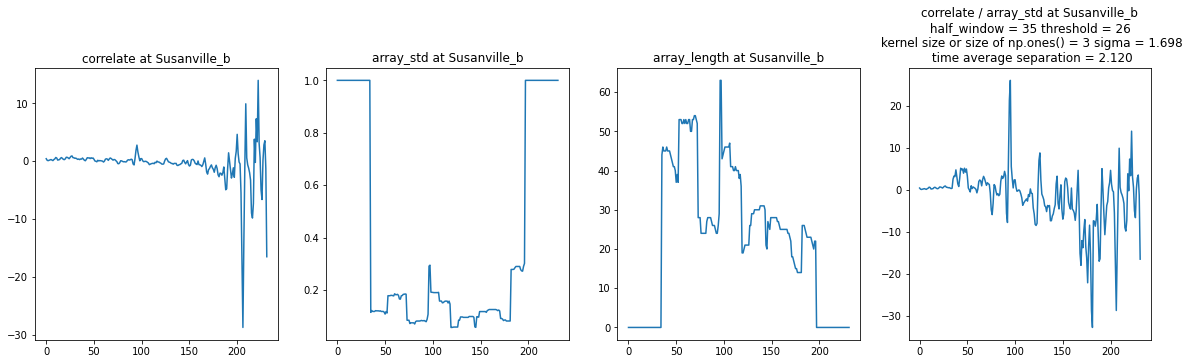

list_mask [95]
Possible detection in Susanville_b, in time : [18608.693]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.569182710731447
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.8548848693846178
threshold 8


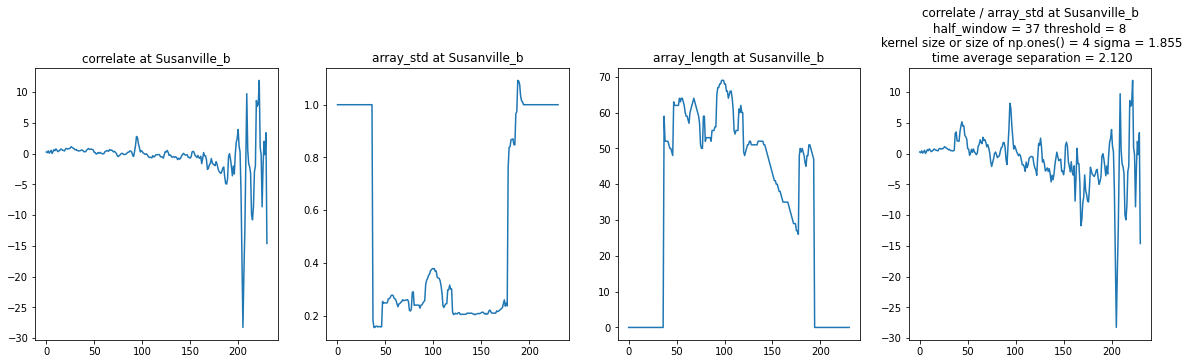

list_mask [94]
Possible detection in Susanville_b, in time : [18606.558]
--------------------------------------------------------------------------------------------


In [89]:
for j in range(2, 5, 1):
  algorithm('20190128_Susanville_b.dat', num_ones=j)

safe_div(correlate, array_std) is too high, there is an error at Susanville_c, maximum safe_div(correlate, array_std) is  1756.687004358324
kernel size or size of np.ones() : 3
std_correlate 3.421366484253177
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.7780655793214646
threshold 25


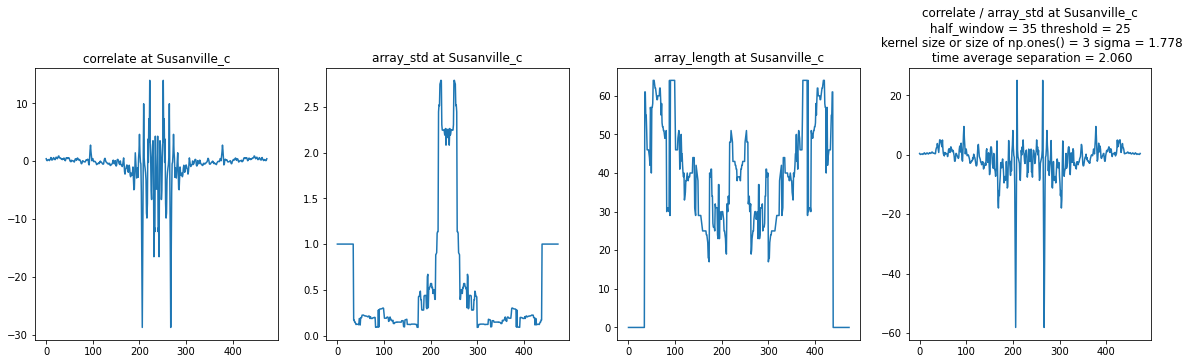

list_mask [209, 264]
Possible detection in Susanville_c, in time : [18852.137 18965.863]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.770308933314508
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.9594090748796487
threshold 7


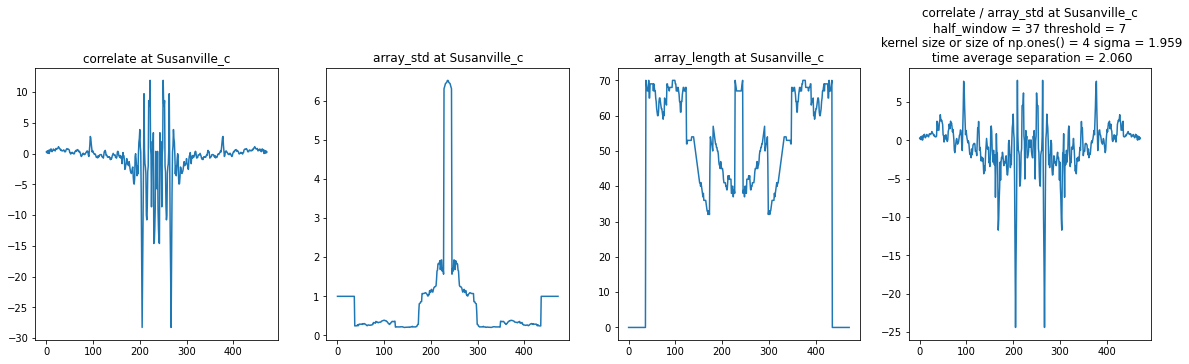

list_mask [94, 95, 209, 263, 377, 378]
Possible detection in Susanville_c, in time : [18606.558 18608.693 18852.137 18963.002 19191.558 19193.424]
--------------------------------------------------------------------------------------------


In [90]:
for j in range(2, 5, 1):
  algorithm('20190128_Susanville_c.dat', num_ones=j)

safe_div(correlate, array_std) is too high, there is an error at Bend, maximum safe_div(correlate, array_std) is  551.8928151898737
kernel size or size of np.ones() : 2
std_correlate 0.39549132445221524
std_norm_flux 0.20237887784074302
sigma = std cross-correlation / std norm flux 1.9542124586906606
threshold 6


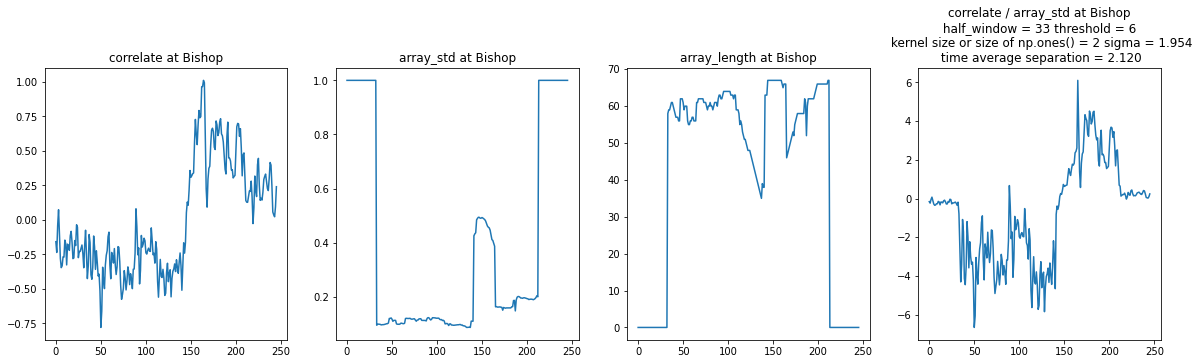

list_mask [165]
Possible detection in Bishop, in time : [18750.348]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Blythe, maximum safe_div(correlate, array_std) is  424.90616420585394
safe_div(correlate, array_std) is too high, there is an error at Carson_City, maximum safe_div(correlate, array_std) is  1064.4785483981095
kernel size or size of np.ones() : 2
std_correlate 0.3233194810502829
std_norm_flux 0.2019605857474751
sigma = std cross-correlation / std norm flux 1.600903858808129
threshold 30


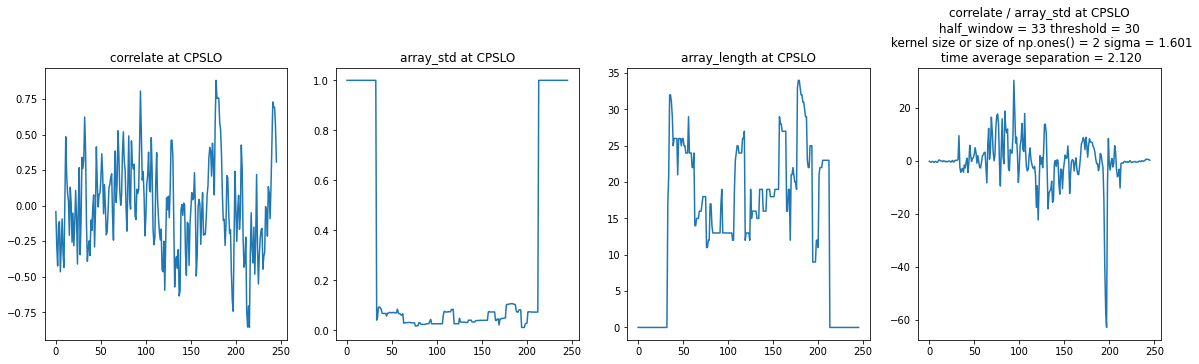

list_mask [94]
Possible detection in CPSLO, in time : [18606.728]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.35878426506404987
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 1.5640411248057953
threshold 30


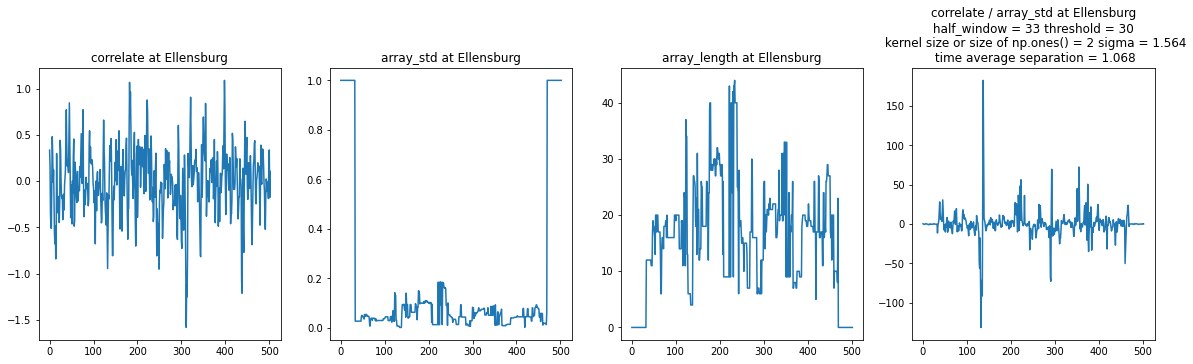

list_mask [45, 136, 137, 138, 217, 221, 223, 231, 293, 351, 355, 356, 375]
Possible detection in Ellensburg, in time : [18454.274 18551.434 18552.504 18553.574 18637.924 18642.194 18644.324
 18652.864 18719.074 18780.994 18785.264 18786.334 18806.624]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.3853908177421978
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 1.7372387017792967
threshold 4


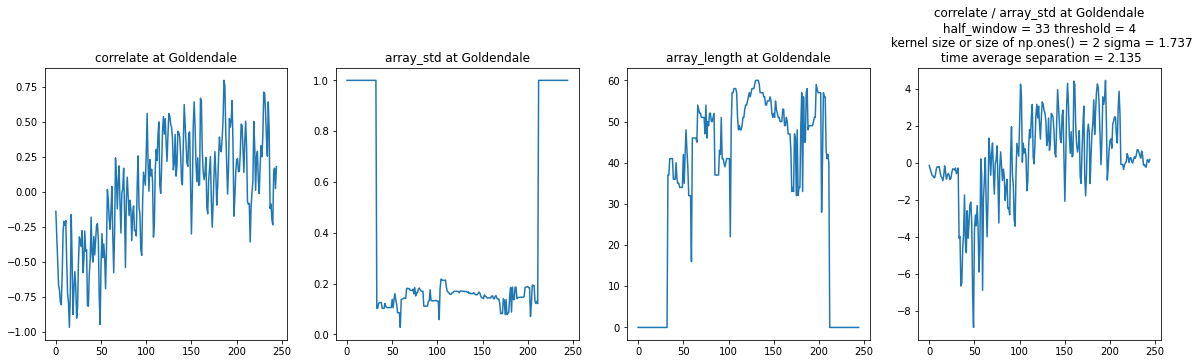

list_mask [101, 153, 160, 161, 186, 187, 195]
Possible detection in Goldendale, in time : [18746.998 18858.048 18872.988 18875.128 18928.518 18930.648 18947.738]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Indian_springs, maximum safe_div(correlate, array_std) is  792.428226477087
safe_div(correlate, array_std) is too high, there is an error at Klamath_falls, maximum safe_div(correlate, array_std) is  2462.852918870965
kernel size or size of np.ones() : 2
std_correlate 0.24619771872549057
std_norm_flux 0.14554610160413653
sigma = std cross-correlation / std norm flux 1.6915445759936
threshold 29


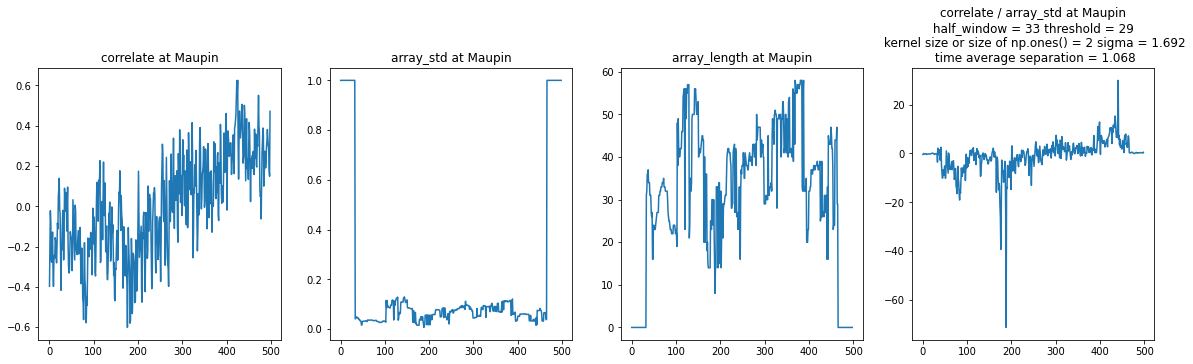

list_mask [441]
Possible detection in Maupin, in time : [18877.974]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Mohave_valley, maximum safe_div(correlate, array_std) is  552.4420506677551
safe_div(correlate, array_std) is too high, there is an error at Okanogan, maximum safe_div(correlate, array_std) is  907.7588519717604
kernel size or size of np.ones() : 2
std_correlate 0.3457837067276459
std_norm_flux 0.19011149253937454
sigma = std cross-correlation / std norm flux 1.818846941386406
threshold 16


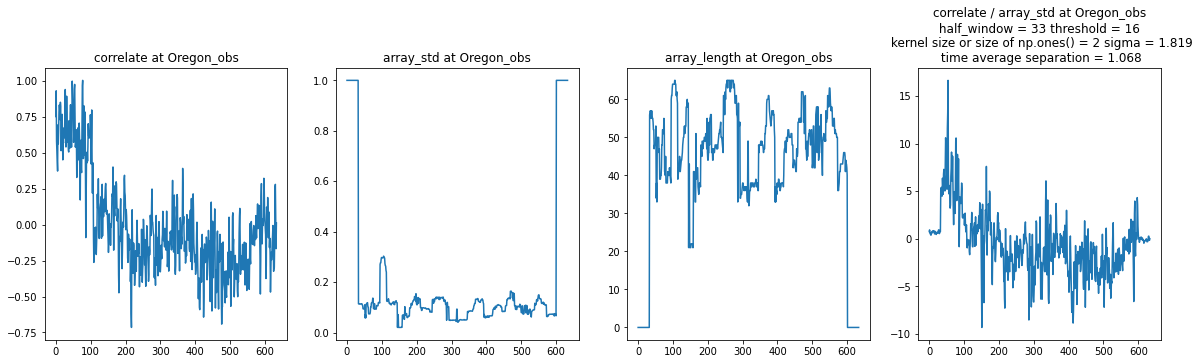

list_mask [54]
Possible detection in Oregon_obs, in time : [18373.454]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Parker, maximum safe_div(correlate, array_std) is  918.6449939993062
kernel size or size of np.ones() : 2
std_correlate 0.14610343843158752
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 1.6379072483224335
threshold 30


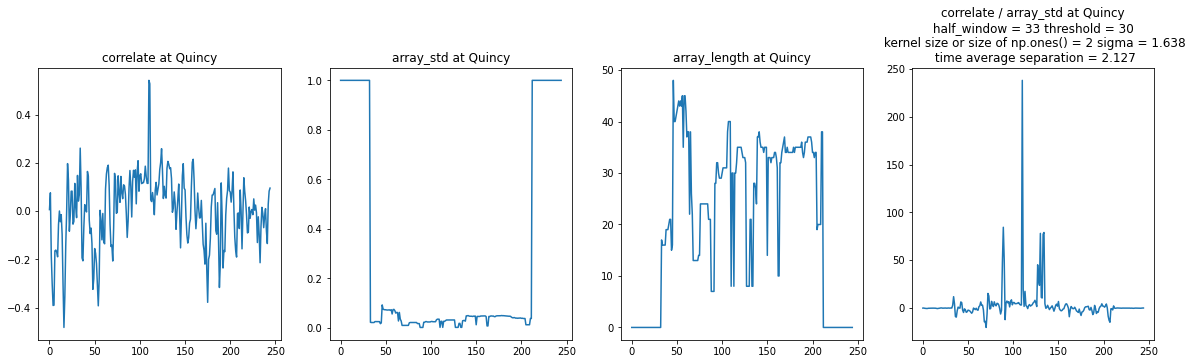

list_mask [88, 89, 90, 110, 127, 130, 133, 134]
Possible detection in Quincy, in time : [18598.96 18601.095 18603.23 18645.942 18682.242 18688.649 18695.056
 18697.191]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Reno, maximum safe_div(correlate, array_std) is  760.0957600961826
kernel size or size of np.ones() : 2
std_correlate 0.23066987635125552
std_norm_flux 0.13170757531223723
sigma = std cross-correlation / std norm flux 1.7513789605830175
threshold 17


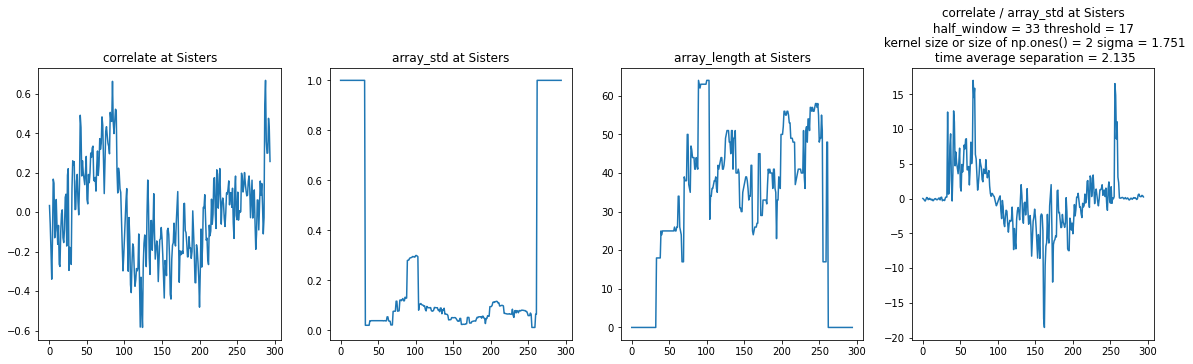

list_mask [67]
Possible detection in Sisters, in time : [18473.968]
--------------------------------------------------------------------------------------------
safe_div(correlate, array_std) is too high, there is an error at Susanville, maximum safe_div(correlate, array_std) is  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


safe_div(correlate, array_std) is too high, there is an error at Susanville_b, maximum safe_div(correlate, array_std) is  inf
safe_div(correlate, array_std) is too high, there is an error at Susanville_c, maximum safe_div(correlate, array_std) is  1756.687004358324
Cross-correlation is too high, there is a bad observation at Wildwood, max. cross-correlation is 682.7112000000001
safe_div(correlate, array_std) is too high, there is an error at Yakima, maximum safe_div(correlate, array_std) is  1044.485034113159
safe_div(correlate, array_std) is too high, there is an error at Yuma, maximum safe_div(correlate, array_std) is  2135.5458327877714
kernel size or size of np.ones() : 3
std_correlate 0.26304320261275643
std_norm_flux 0.13050723485391302
sigma = std cross-correlation / std norm flux 2.01554498420874
threshold 5


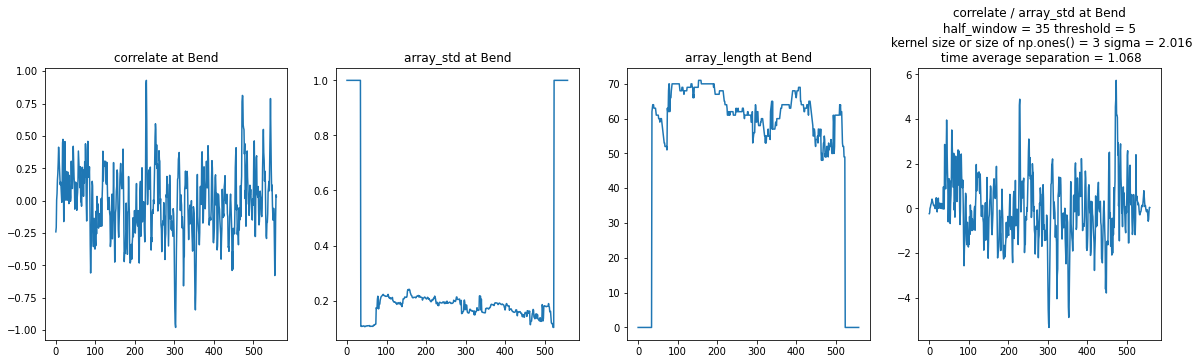

list_mask [473]
Possible detection in Bend, in time : [18895.014]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.5842679795998345
std_norm_flux 0.20237887784074302
sigma = std cross-correlation / std norm flux 2.887000787007078
threshold 3


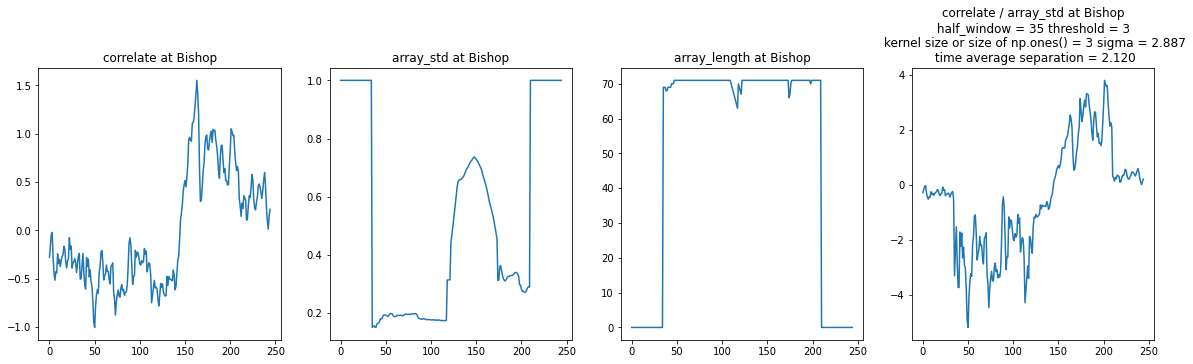

list_mask [174, 179, 181, 182, 183, 201, 202, 203, 204]
Possible detection in Bishop, in time : [18771.708 18782.388 18786.648 18788.788 18790.928 18829.368 18831.498
 18833.638 18835.778]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.3239594829078389
std_norm_flux 0.17587123625700551
sigma = std cross-correlation / std norm flux 1.8420265291956435
threshold 6


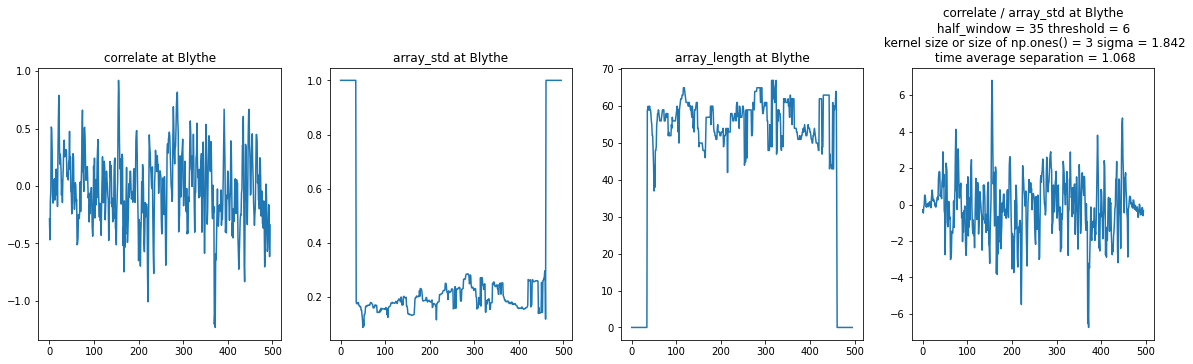

list_mask [155]
Possible detection in Blythe, in time : [18547.744]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.17997692258021755
std_norm_flux 0.09521950449101106
sigma = std cross-correlation / std norm flux 1.890126645189671
threshold 6


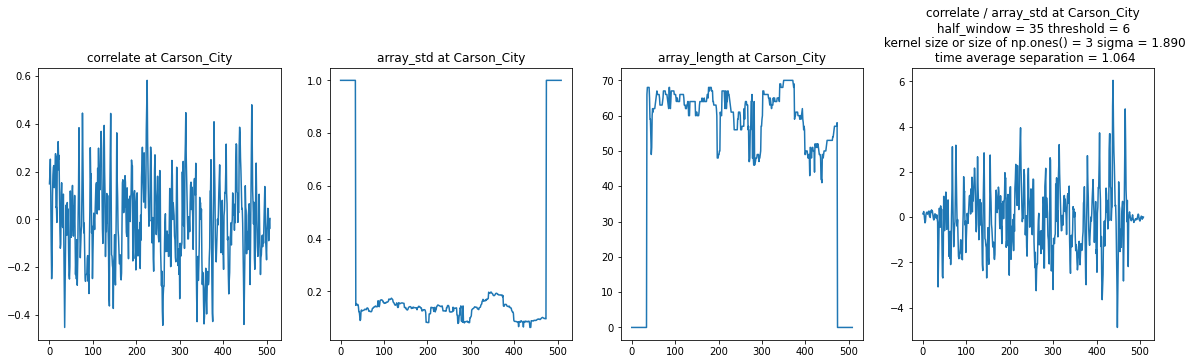

list_mask [438]
Possible detection in Carson_City, in time : [18869.115]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.437757749208494
std_norm_flux 0.2019605857474751
sigma = std cross-correlation / std norm flux 2.1675405009760267
threshold 3


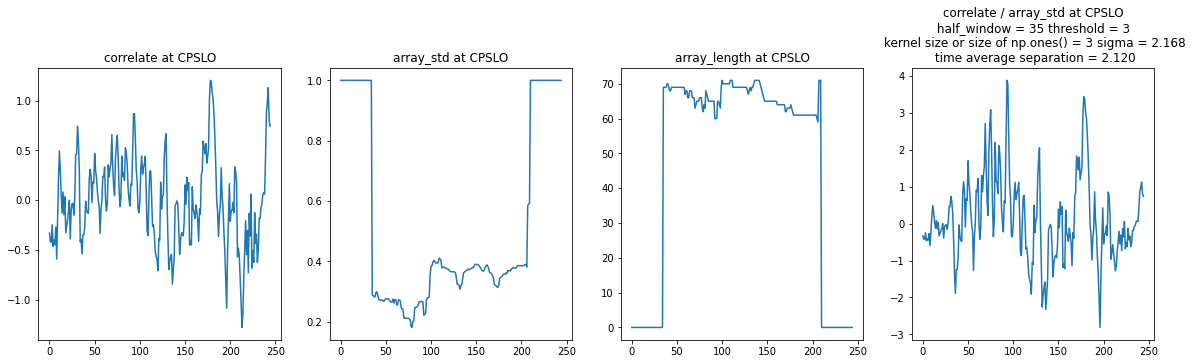

list_mask [75, 93, 94, 178, 179, 180]
Possible detection in CPSLO, in time : [18568.298 18606.728 18608.868 18788.248 18790.388 18792.518]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.46423295383338975
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 2.023721500595553
threshold 7


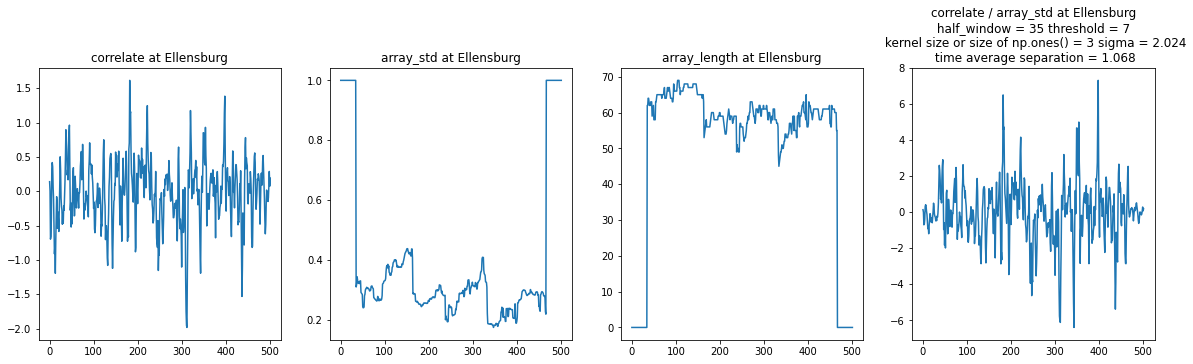

list_mask [398]
Possible detection in Ellensburg, in time : [18832.244]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.5453572608948345
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 2.4583246312749902
threshold 3


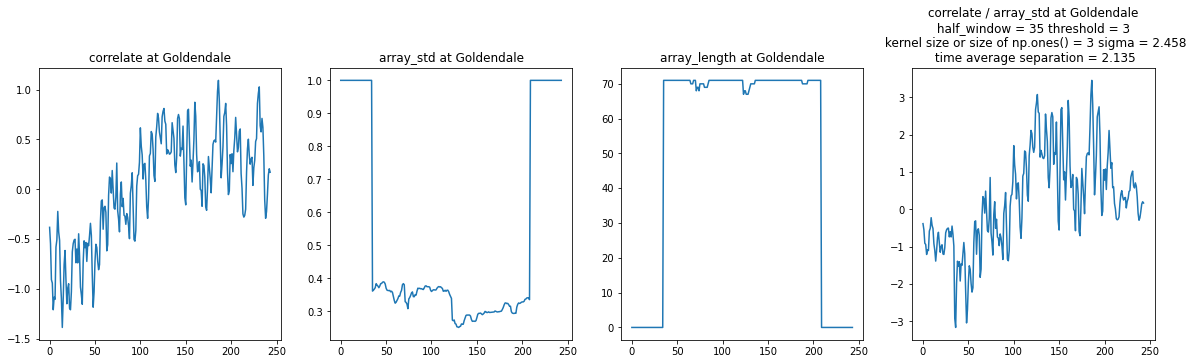

list_mask [126, 185, 186]
Possible detection in Goldendale, in time : [18802.518 18928.518 18930.648]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2561962473533214
std_norm_flux 0.1378076016905981
sigma = std cross-correlation / std norm flux 1.859086467004384
threshold 4


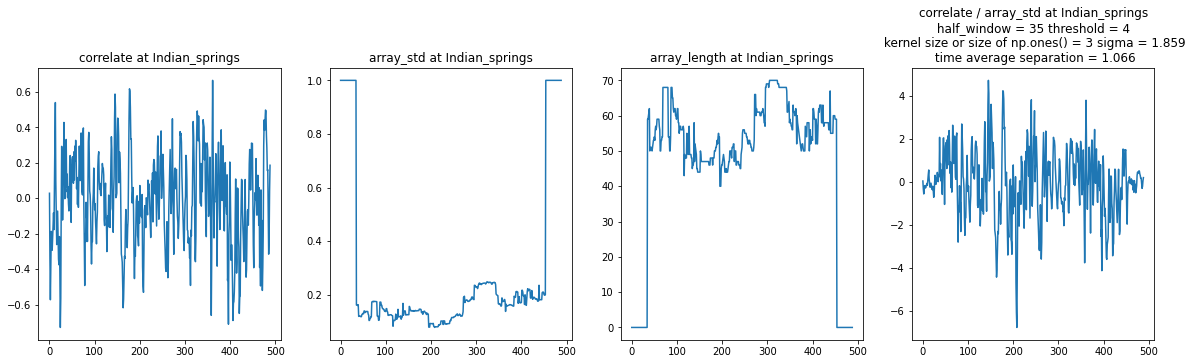

list_mask [145, 146, 177, 178]
Possible detection in Indian_springs, in time : [18552.194 18553.254 18586.354 18587.424]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.26017649811693166
std_norm_flux 0.1380105245335426
sigma = std cross-correlation / std norm flux 1.8851931691173118
threshold 6


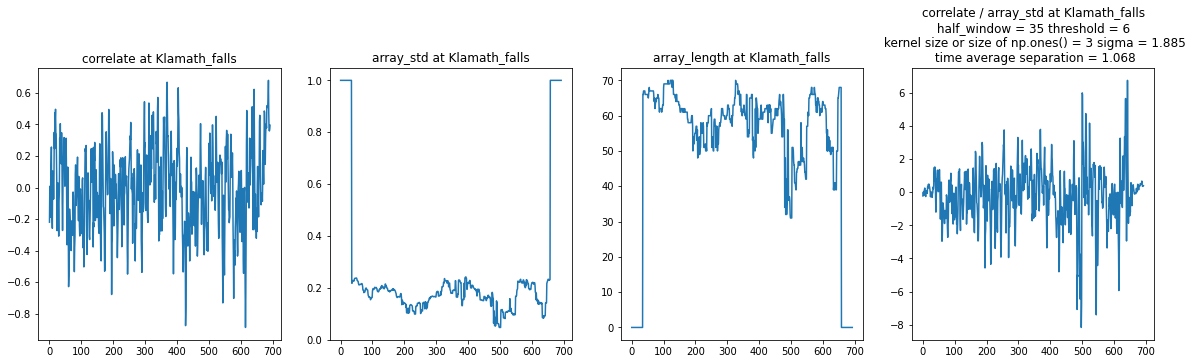

list_mask [500, 642]
Possible detection in Klamath_falls, in time : [18770.464 18922.084]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.34673948585035036
std_norm_flux 0.14554610160413653
sigma = std cross-correlation / std norm flux 2.3823344083335845
threshold 6


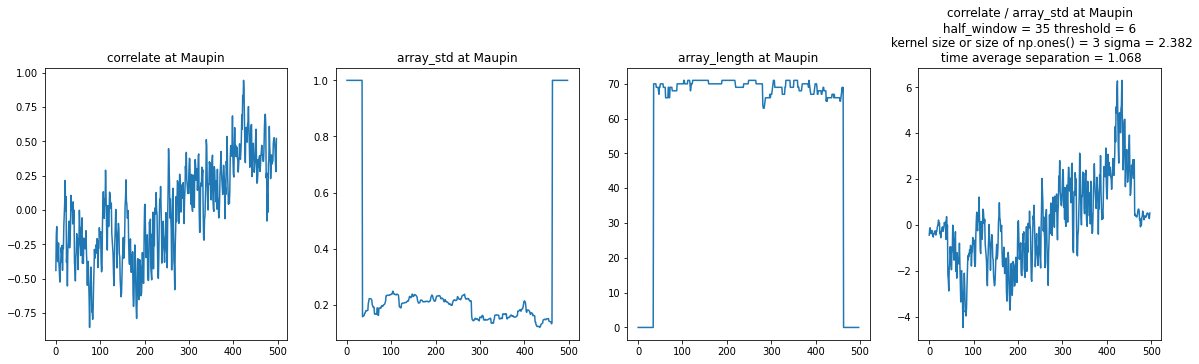

list_mask [424, 434]
Possible detection in Maupin, in time : [18860.894 18871.574]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.3302560913675037
std_norm_flux 0.16414524211112588
sigma = std cross-correlation / std norm flux 2.0119748042646357
threshold 5


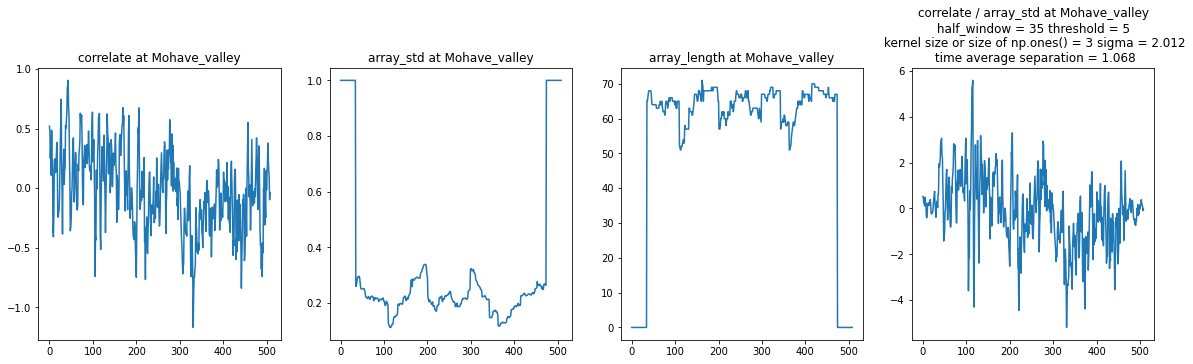

list_mask [113, 114, 115]
Possible detection in Mohave_valley, in time : [18493.134 18494.204 18495.264]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.22250621351202524
std_norm_flux 0.11027922160658381
sigma = std cross-correlation / std norm flux 2.0176621694502543
threshold 4


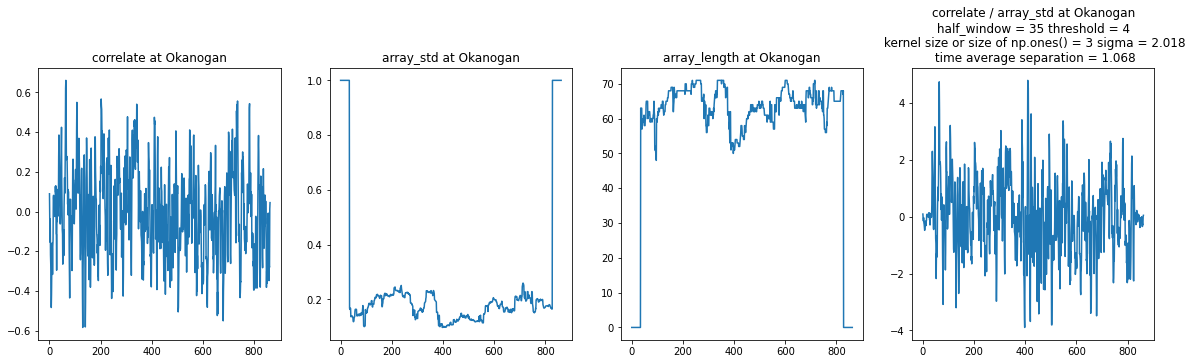

list_mask [63, 64, 410, 411, 412]
Possible detection in Okanogan, in time : [18170.464 18171.534 18540.974 18542.034 18543.104]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.4982296999130013
std_norm_flux 0.19011149253937454
sigma = std cross-correlation / std norm flux 2.620723730364757
threshold 6


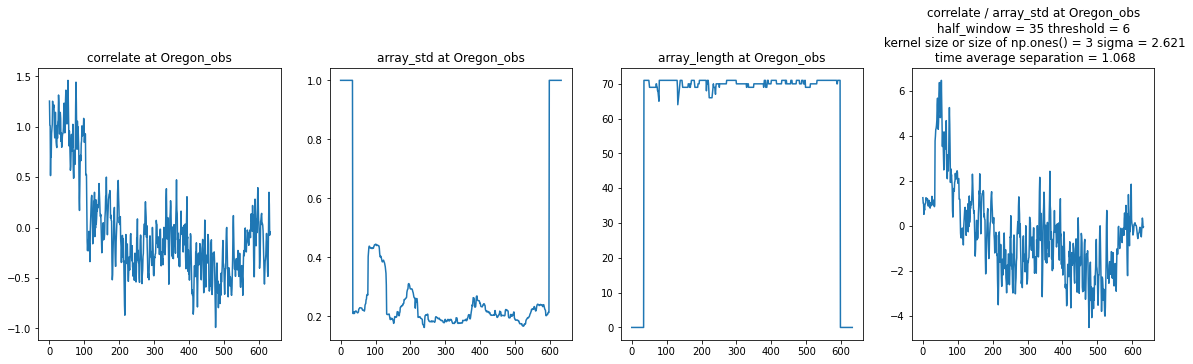

list_mask [47, 48, 53]
Possible detection in Oregon_obs, in time : [18367.054 18368.114 18373.454]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.18721471402739573
std_norm_flux 0.09775810947071388
sigma = std cross-correlation / std norm flux 1.9150811635067577
threshold 4


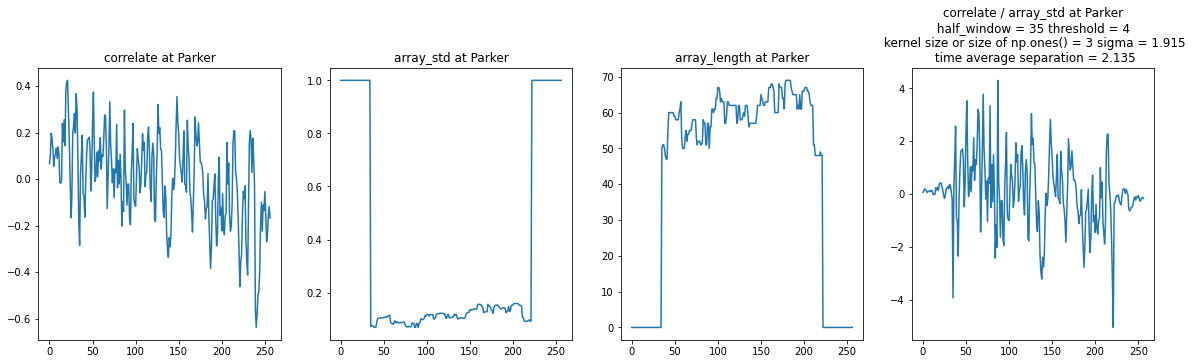

list_mask [87]
Possible detection in Parker, in time : [18563.438]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.19674898404580976
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 2.205674216350509
threshold 7


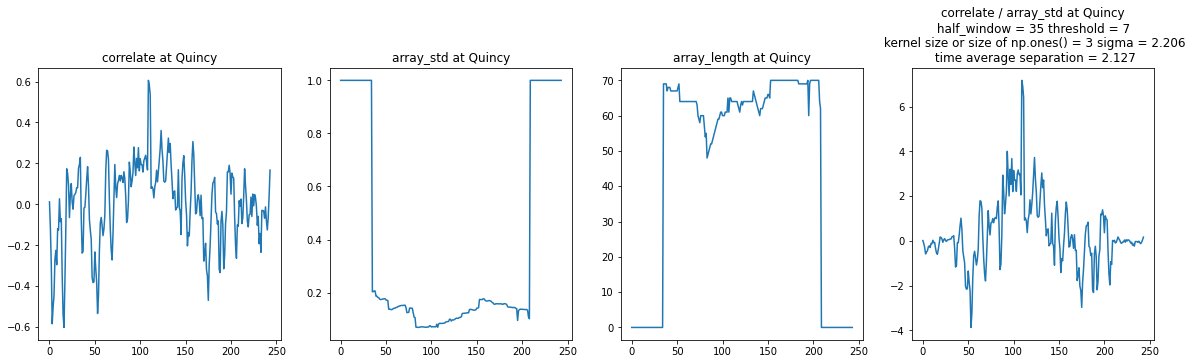

list_mask [109]
Possible detection in Quincy, in time : [18645.942]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2434318643190354
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 1.8936166996276598
threshold 9


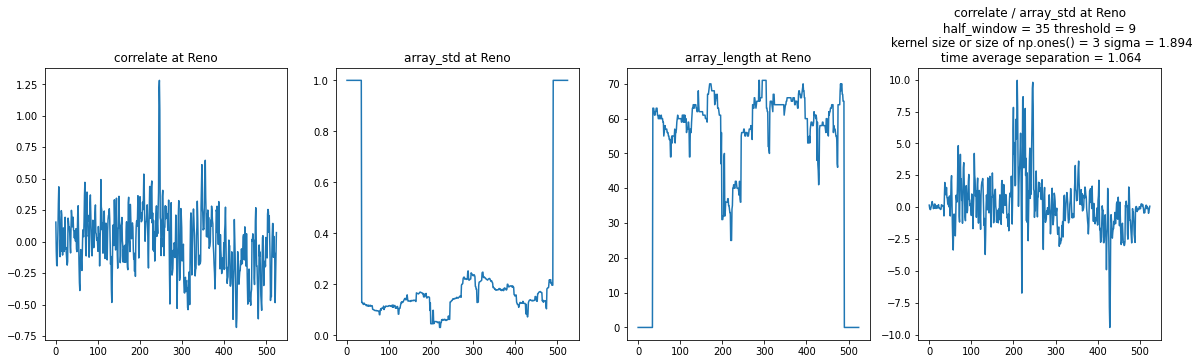

list_mask [209, 245, 246]
Possible detection in Reno, in time : [18602.978 18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.32453466241111806
std_norm_flux 0.13170757531223723
sigma = std cross-correlation / std norm flux 2.464054642580341
threshold 2


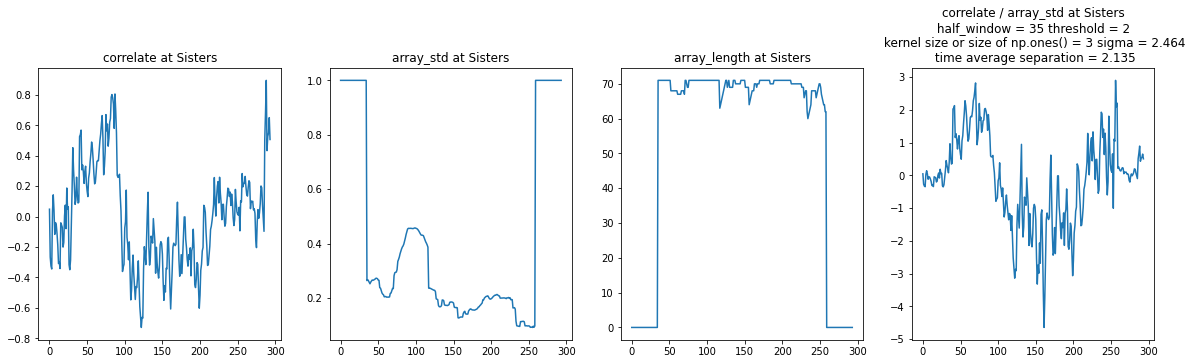

list_mask [40, 41, 42, 56, 57, 67, 68, 69, 70, 75, 82, 83, 256, 257, 258]
Possible detection in Sisters, in time : [18418.448 18420.588 18422.718 18452.618 18454.758 18476.108 18478.248
 18480.378 18482.518 18493.188 18508.138 18510.278 18879.708 18881.848
 18883.978]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.252607165121131
std_norm_flux 1.9202848518848066
sigma = std cross-correlation / std norm flux 1.6938149368457587
threshold 9


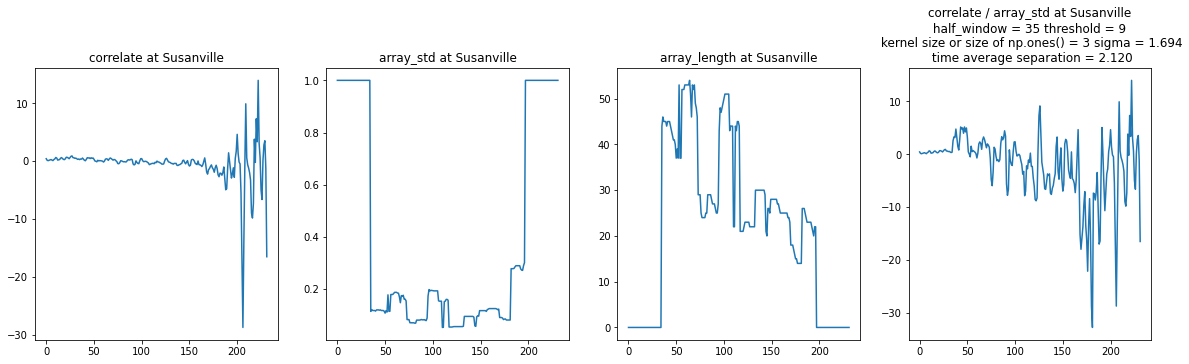

list_mask [126]
Possible detection in Susanville, in time : [18674.892]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.267658877710292
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.698184571036715
threshold 26


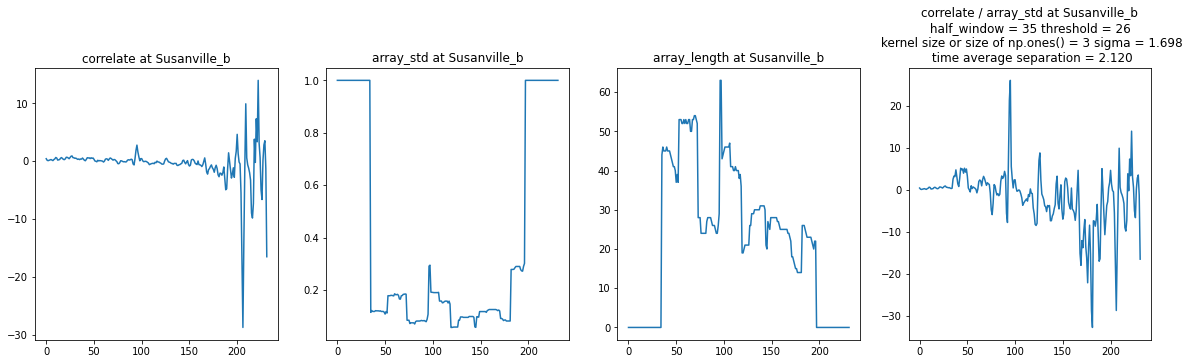

list_mask [95]
Possible detection in Susanville_b, in time : [18608.693]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.421366484253177
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.7780655793214646
threshold 25


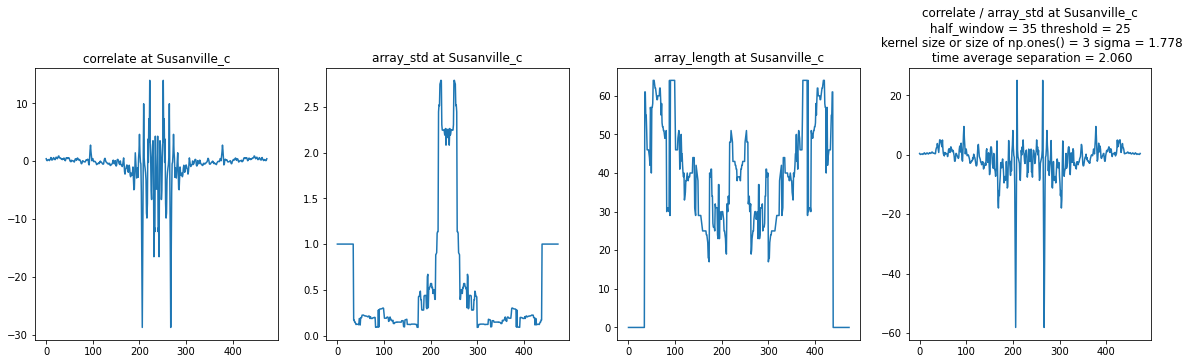

list_mask [209, 264]
Possible detection in Susanville_c, in time : [18852.137 18965.863]
--------------------------------------------------------------------------------------------
Cross-correlation is too high, there is a bad observation at Wildwood, max. cross-correlation is 682.5977
kernel size or size of np.ones() : 3
std_correlate 0.2653556898179785
std_norm_flux 0.14673759889827567
sigma = std cross-correlation / std norm flux 1.8083687603606873
threshold 3


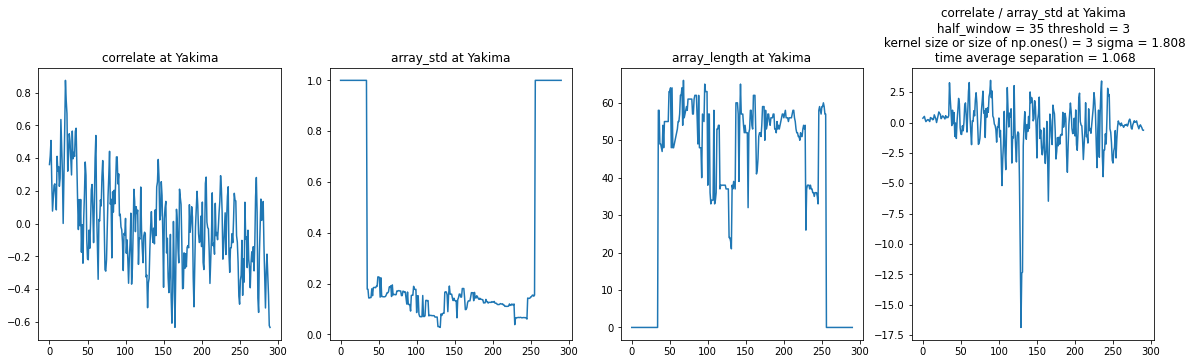

list_mask [35, 61, 89, 120, 235]
Possible detection in Yakima, in time : [18717.314 18745.074 18774.974 18808.074 18930.864]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.31825380235958717
std_norm_flux 0.16072292579244396
sigma = std cross-correlation / std norm flux 1.980139428089911
threshold 17


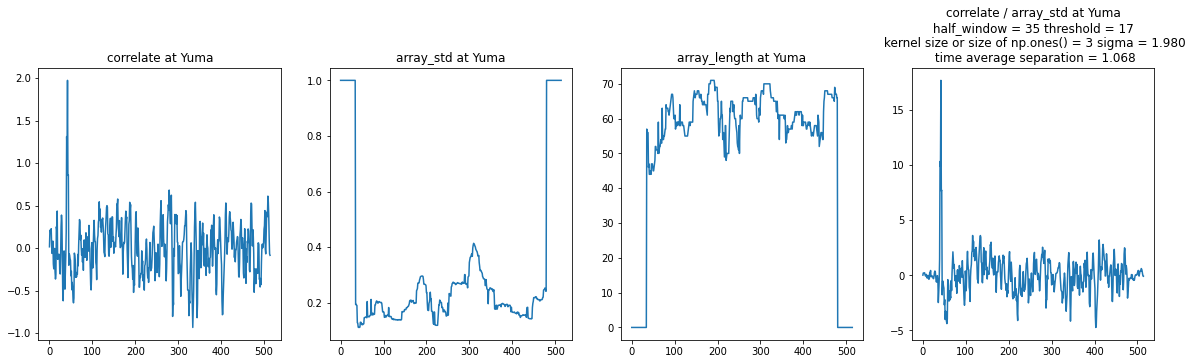

list_mask [42]
Possible detection in Yuma, in time : [18349.756]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3189883623368755
std_norm_flux 0.13050723485391302
sigma = std cross-correlation / std norm flux 2.4442197606434934
threshold 3


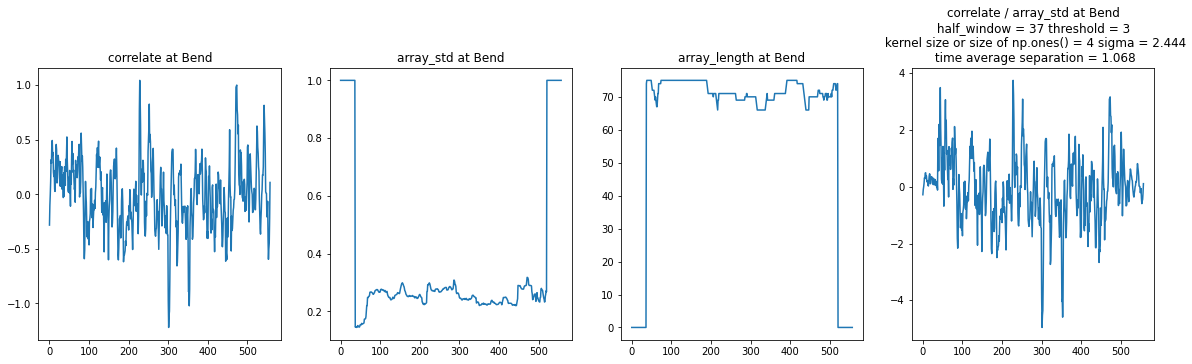

list_mask [44, 57, 228, 229, 252, 471, 472, 473]
Possible detection in Bend, in time : [18436.964 18450.844 18633.424 18634.494 18659.054 18892.884 18893.954
 18895.014]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.7728667033723462
std_norm_flux 0.20237887784074302
sigma = std cross-correlation / std norm flux 3.8189099159870543
threshold 3


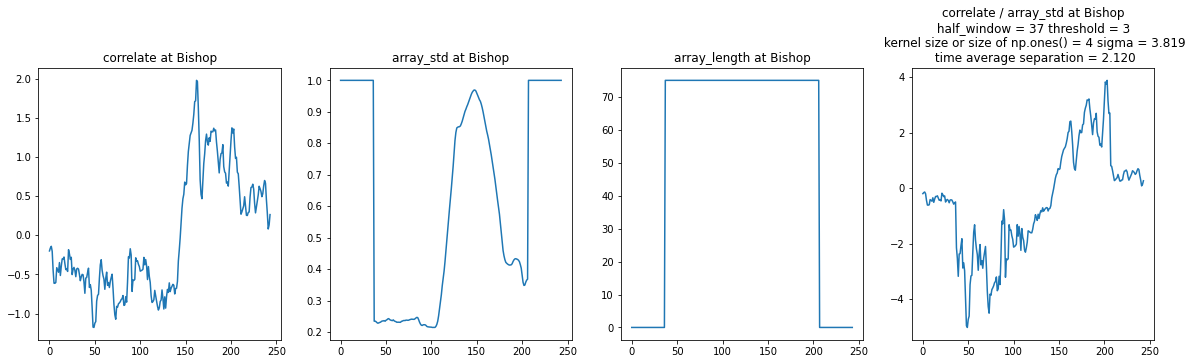

list_mask [181, 182, 183, 200, 201, 202, 203, 204]
Possible detection in Bishop, in time : [18786.648 18788.788 18790.928 18827.228 18829.368 18831.498 18833.638
 18835.778]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.38015894254108995
std_norm_flux 0.17587123625700551
sigma = std cross-correlation / std norm flux 2.1615754266124174
threshold 5


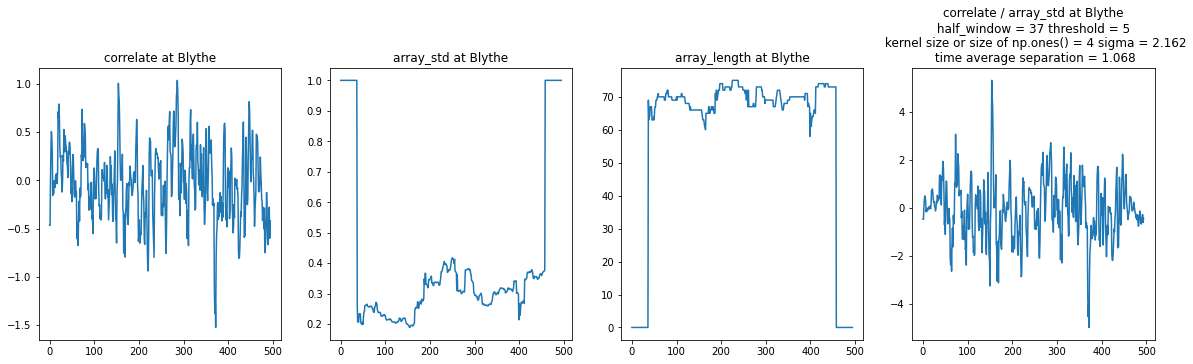

list_mask [154]
Possible detection in Blythe, in time : [18546.684]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.21261361485471345
std_norm_flux 0.09521950449101106
sigma = std cross-correlation / std norm flux 2.2328788202713725
threshold 3


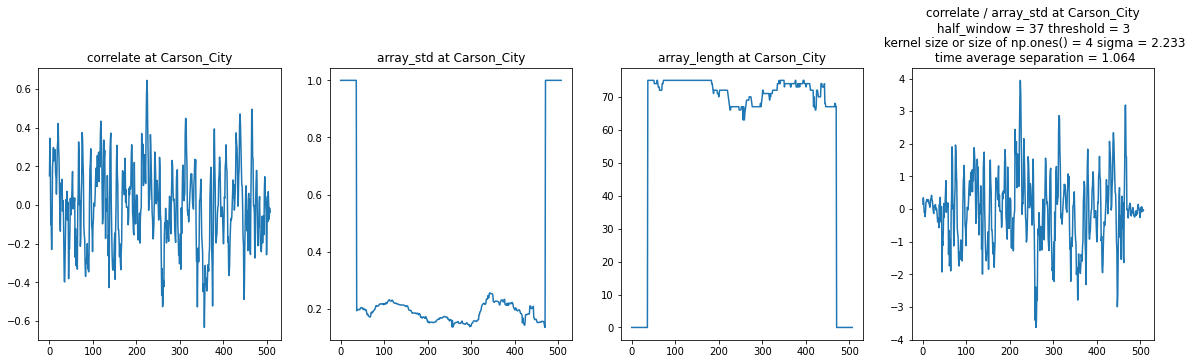

list_mask [223, 224, 225, 465, 466]
Possible detection in Carson_City, in time : [18639.552 18640.621 18641.691 18897.947 18899.012]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.545893998464101
std_norm_flux 0.2019605857474751
sigma = std cross-correlation / std norm flux 2.7029729411988783
threshold 2


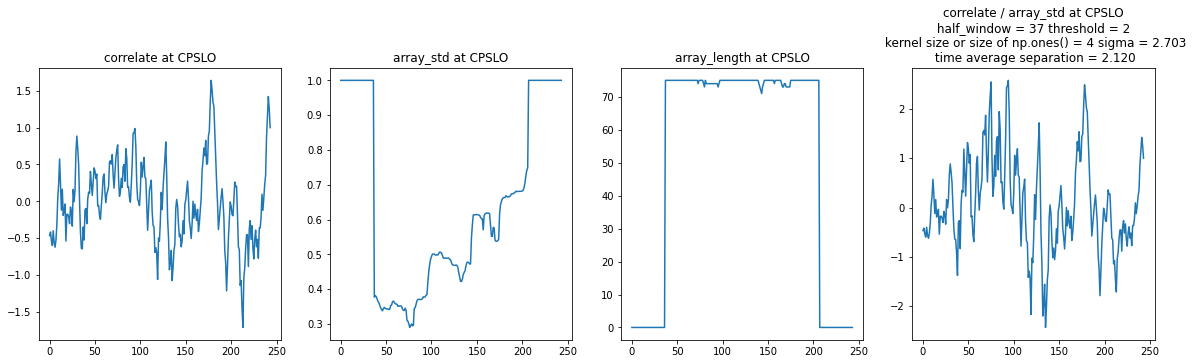

list_mask [74, 75, 92, 93, 94, 177, 178, 179, 180]
Possible detection in CPSLO, in time : [18566.158 18568.298 18604.598 18606.728 18608.868 18786.118 18788.248
 18790.388 18792.518]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.5590339875899496
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 2.4369857652446525
threshold 5


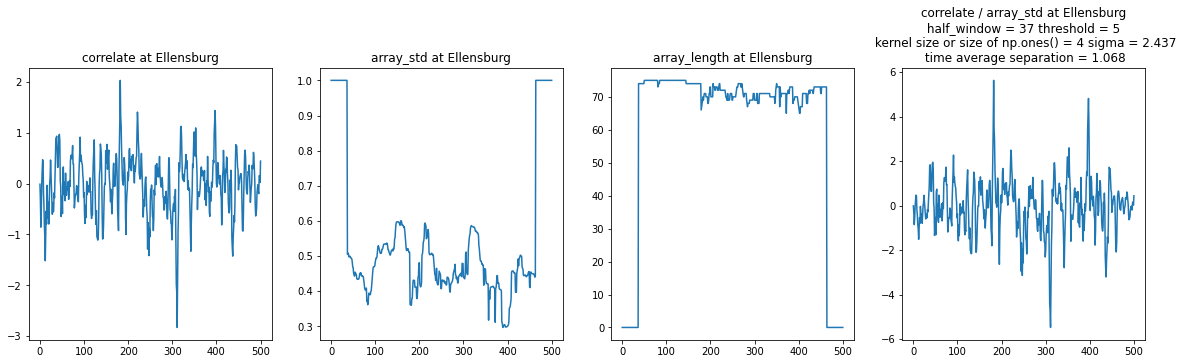

list_mask [182]
Possible detection in Ellensburg, in time : [18601.614]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.7023253519168521
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 3.165894791522756
threshold 3


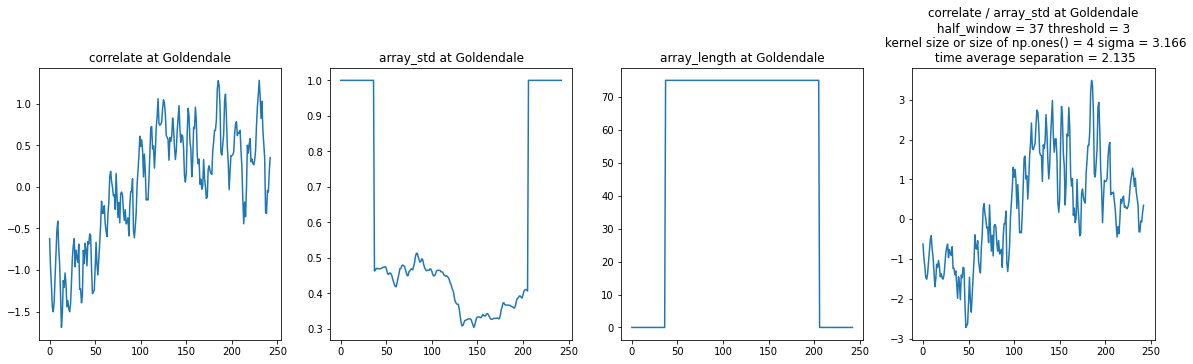

list_mask [184, 185, 186]
Possible detection in Goldendale, in time : [18926.378 18928.518 18930.648]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3057523944680551
std_norm_flux 0.1378076016905981
sigma = std cross-correlation / std norm flux 2.2186903386833627
threshold 2


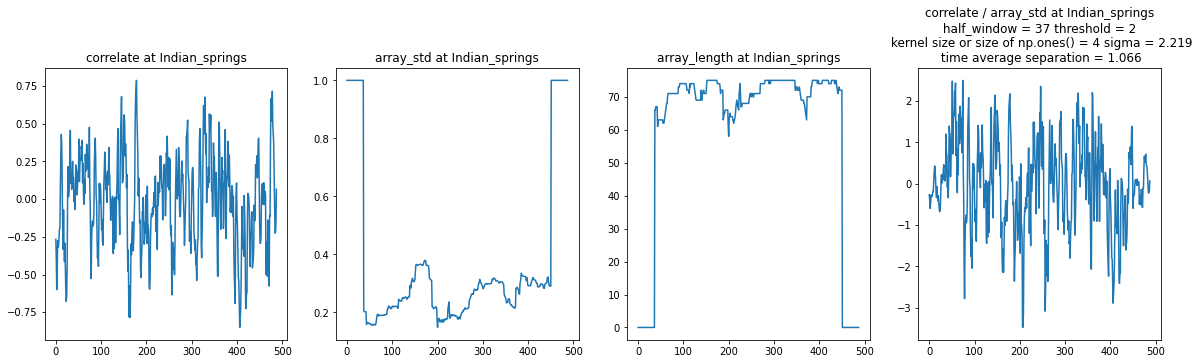

list_mask [51, 56, 57, 58, 74, 87, 145, 178, 246, 329, 360, 361]
Possible detection in Indian_springs, in time : [18451.824 18457.164 18458.224 18459.294 18476.374 18490.254 18552.194
 18587.424 18660.024 18748.654 18781.754 18782.814]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3096490687342434
std_norm_flux 0.1380105245335426
sigma = std cross-correlation / std norm flux 2.243662719063032
threshold 2


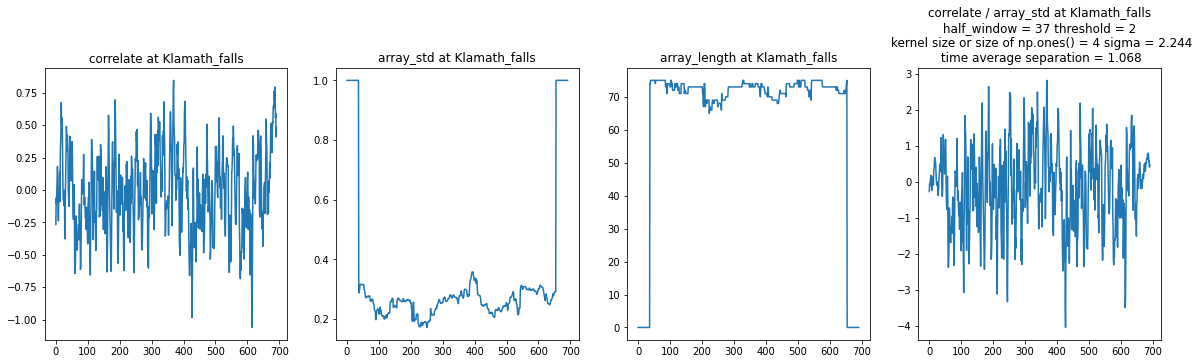

list_mask [165, 186, 252, 254, 255, 297, 321, 339, 359, 368, 369, 404, 473, 512]
Possible detection in Klamath_falls, in time : [18412.774 18435.194 18505.664 18507.804 18508.864 18553.714 18579.334
 18598.554 18619.904 18629.524 18630.584 18667.954 18741.634 18783.274]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.44625682102475733
std_norm_flux 0.14554610160413653
sigma = std cross-correlation / std norm flux 3.0660857014123857
threshold 6


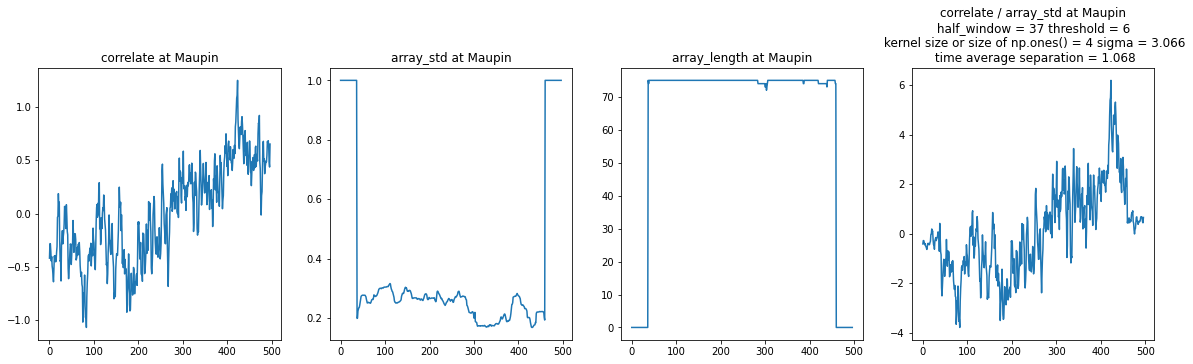

list_mask [423]
Possible detection in Maupin, in time : [18859.824]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.40562141962941056
std_norm_flux 0.16414524211112588
sigma = std cross-correlation / std norm flux 2.471112865731472
threshold 4


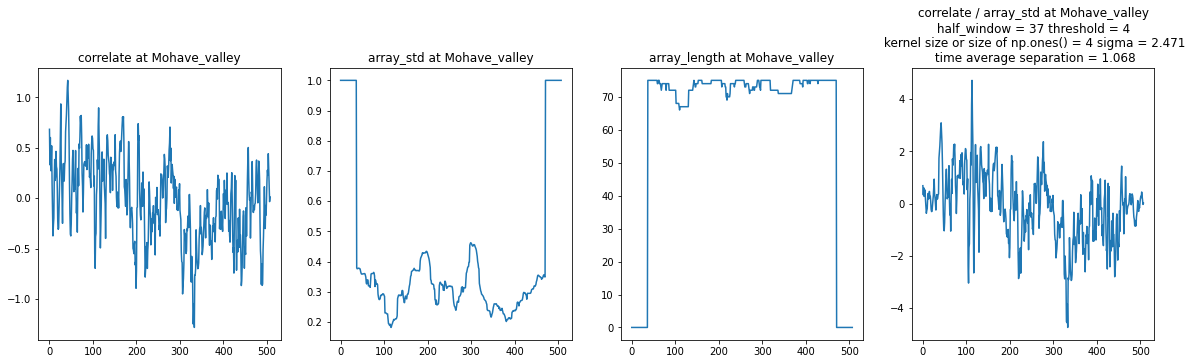

list_mask [113]
Possible detection in Mohave_valley, in time : [18493.134]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.2685132811345091
std_norm_flux 0.11027922160658381
sigma = std cross-correlation / std norm flux 2.4348492601119207
threshold 3


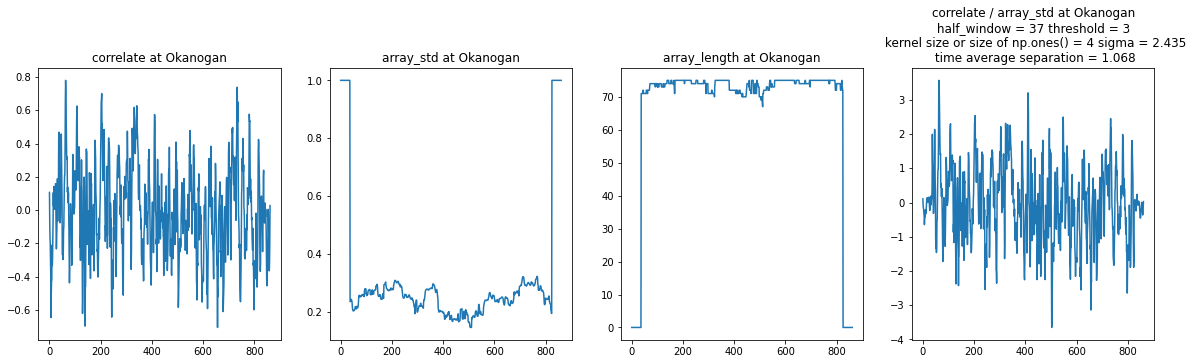

list_mask [62, 63, 64, 410, 411]
Possible detection in Okanogan, in time : [18169.404 18170.464 18171.534 18540.974 18542.034]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.6491042419654105
std_norm_flux 0.19011149253937454
sigma = std cross-correlation / std norm flux 3.414334574386515
threshold 7


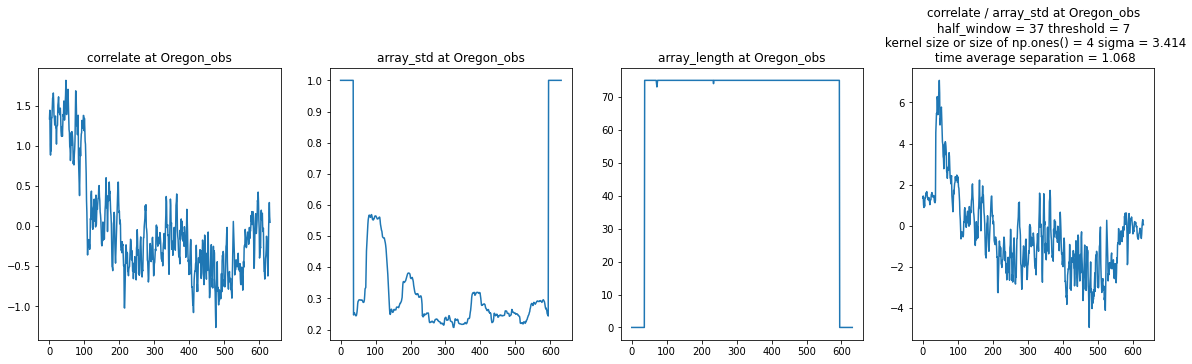

list_mask [47]
Possible detection in Oregon_obs, in time : [18367.054]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.22427867718561786
std_norm_flux 0.09775810947071388
sigma = std cross-correlation / std norm flux 2.294220688185533
threshold 2


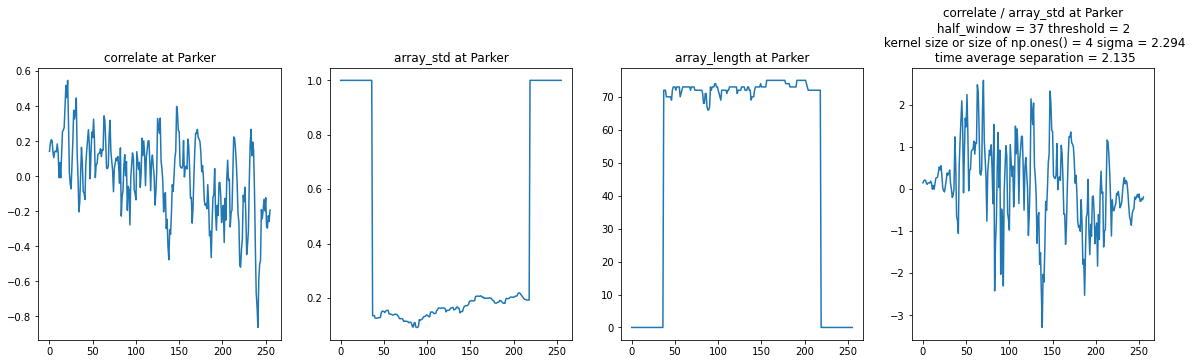

list_mask [45, 51, 63, 64, 70, 125, 128, 147, 148]
Possible detection in Parker, in time : [18473.748 18486.558 18512.178 18514.318 18527.128 18644.578 18650.988
 18691.558 18693.698]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.24448791443165052
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 2.740856282874849
threshold 5


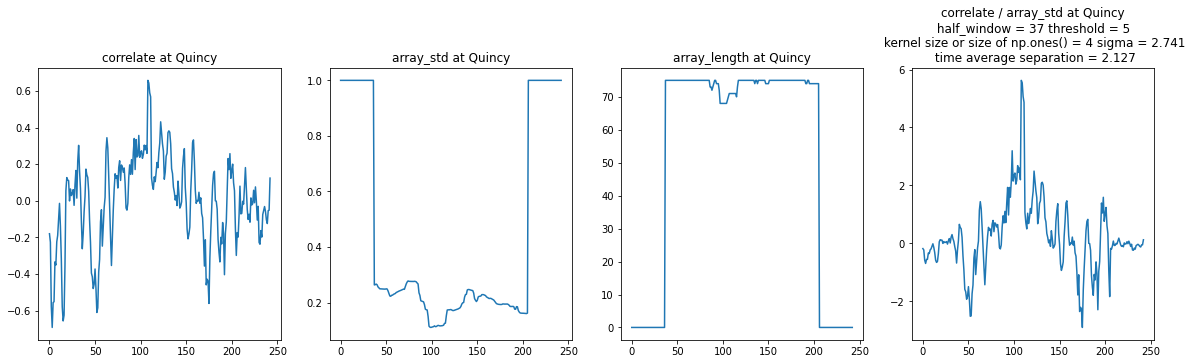

list_mask [108, 109, 110]
Possible detection in Quincy, in time : [18643.803 18645.942 18648.077]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.2890123579473668
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 2.248179912431889
threshold 6


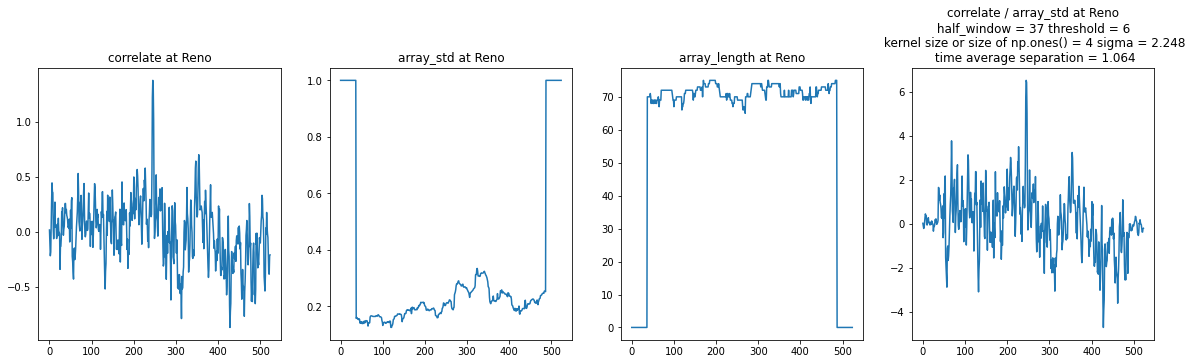

list_mask [245, 246]
Possible detection in Reno, in time : [18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.41870504651916607
std_norm_flux 0.13170757531223723
sigma = std cross-correlation / std norm flux 3.179050601505252
threshold 2


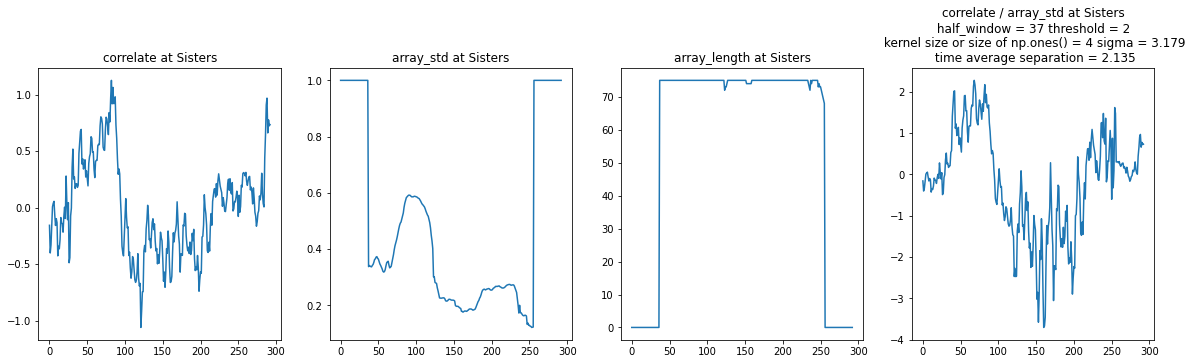

list_mask [41, 42, 67, 68, 69, 82]
Possible detection in Sisters, in time : [18420.588 18422.718 18476.108 18478.248 18480.378 18508.138]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.548423932904164
std_norm_flux 1.9202848518848066
sigma = std cross-correlation / std norm flux 1.8478633153937025
threshold 5


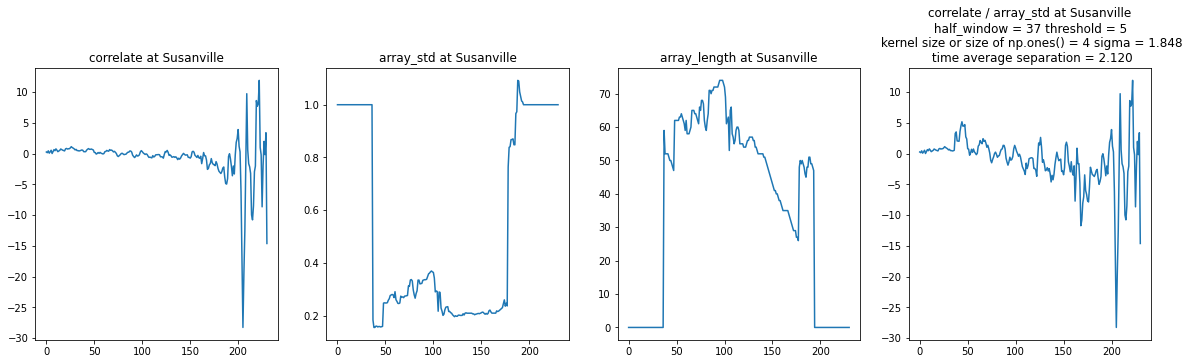

list_mask [44]
Possible detection in Susanville, in time : [18499.785]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.569182710731447
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.8548848693846178
threshold 8


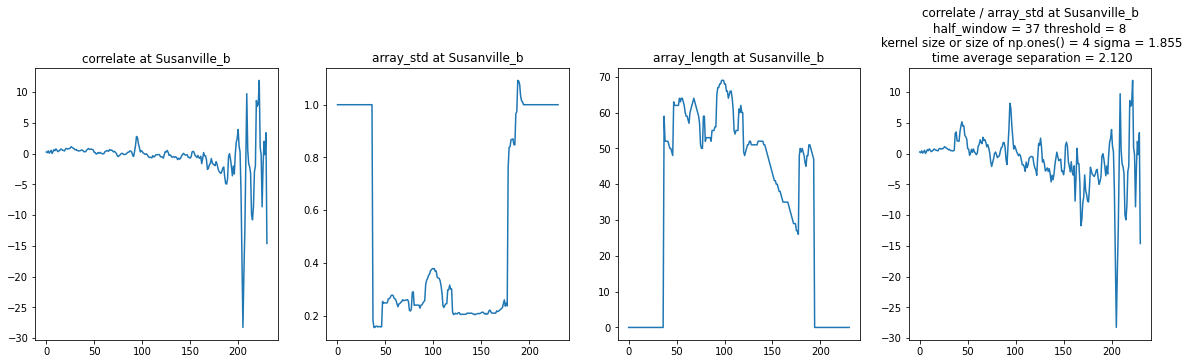

list_mask [94]
Possible detection in Susanville_b, in time : [18606.558]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.770308933314508
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.9594090748796487
threshold 7


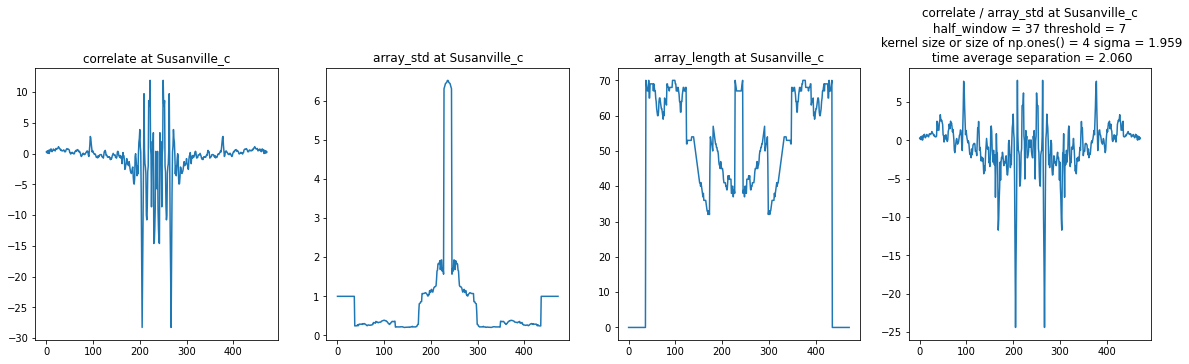

list_mask [94, 95, 209, 263, 377, 378]
Possible detection in Susanville_c, in time : [18606.558 18608.693 18852.137 18963.002 19191.558 19193.424]
--------------------------------------------------------------------------------------------
Cross-correlation is too high, there is a bad observation at Wildwood, max. cross-correlation is 682.2549
kernel size or size of np.ones() : 4
std_correlate 0.3154393865761967
std_norm_flux 0.14673759889827567
sigma = std cross-correlation / std norm flux 2.149683441357602
threshold 2


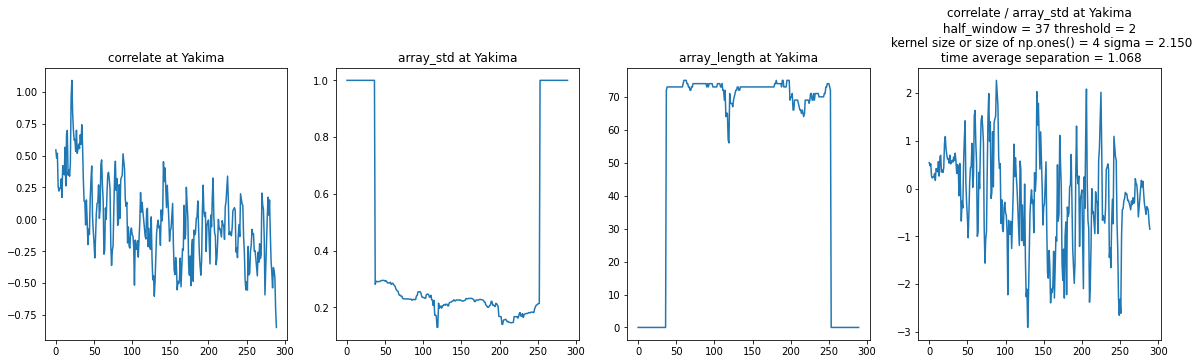

list_mask [88, 141, 206, 225]
Possible detection in Yakima, in time : [18773.904 18830.494 18899.894 18920.184]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3844621111763363
std_norm_flux 0.16072292579244396
sigma = std cross-correlation / std norm flux 2.3920800923747927
threshold 7


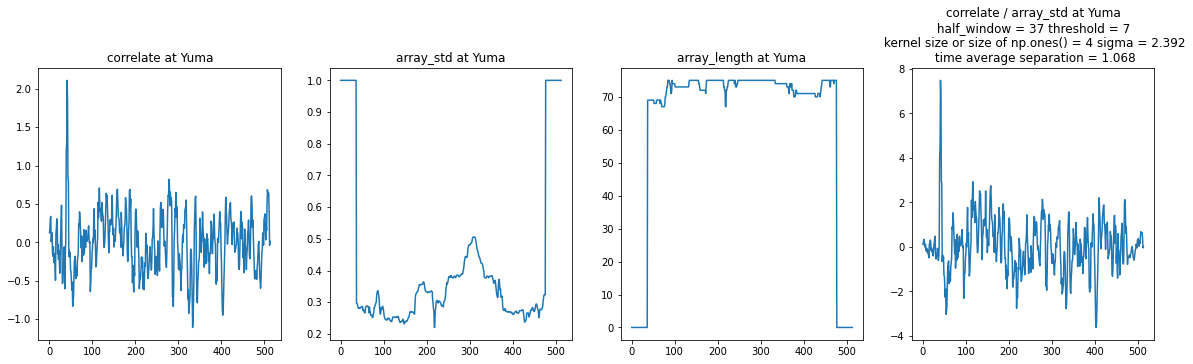

list_mask [41]
Possible detection in Yuma, in time : [18408.69]
--------------------------------------------------------------------------------------------


In [91]:
# itero sobre todas las localidades
for j in range(2, 5, 1): # iteration over kernel size
  for filename in namelist:
    algorithm(filename, num_zeros=4, num_ones=j, half_window=30, threshold=30, sigma=1.7)

**Quincy**

18643.803, 0.9477, 0.0777

18645.942, 0.5093, 0.0654 <-----

18648.077, 0.9617, 0.0758

**Reno**

18640.348, 0.7102, 0.1398

18641.416, 0.1675, 0.1342 <-----

18642.483, 0.8404, 0.1401

**Susanville b**

18602.287, 0.9905, 1.1092

18604.424, 0.0035, 1.0592 <-----

18606.558, 0.1317, 1.0123 <-----

18608.693, 0.0733, 1.4391 <-----

18610.831, 1.1711, 1.3257